<a id="2"></a>
<h1 style="background-color:pink;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">UCI Heart Disease Data Analysis & Modeling </h1>

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Dataset Overview</h3>

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, **5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:**

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
- Total: 1190 observations
- Duplicated: 272 observations

**Final dataset: 918 observations**

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

These datasets were collected and combined at one place to help advance research on CAD-related machine learning and data mining algorithms, and hopefully to ultimately advance clinical diagnosis and early treatment.

|         Column       |                             Description                            |
|:-------------------:|:---------------------------------------------------------------:|
|         Age        |                age of the patient [years]                           |
|         Sex         |                sex of the patient [M: Male, F: Female]                     |
|   ChestPainType    |     chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]      |
|    RestingBP     |     resting blood pressure [mm Hg] |
|      Cholesterol        |     serum cholesterol [mm/dl] |
|  FastingBS   |     fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
 |
|   RestingECG     |     resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]        |
|      MaxHR       |     maximum heart rate achieved [Numeric value between 60 and 202]            |
|      ExerciseAngina       |     exercise-induced angina [Y: Yes, N: No]                           |
|       Oldpeak        |     oldpeak = ST [Numeric value measured in depression]                           |
|       ST_Slope        |     the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]                          |
|        HeartDisease          |     output class [1: heart disease, 0: Normal]                                  |

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Problem Statement</h3>

In the era of abundant medical data and the growing influence of Data Science, numerous organisations are embracing the challenge of developing predictive indicators for potential diseases. Cardiovascular diseases (CVDs) stand as the leading cause of global mortality, claiming an estimated 17.9 million lives annually, constituting 31% of worldwide deaths.

Among the cardiovascular complications, heart failure is a prevalent occurrence. Early detection and management are crucial for individuals with cardiovascular diseases or those at high risk. This risk is often associated with factors such as hypertension, diabetes, hyperlipidemia, or pre-existing conditions. Utilizing machine learning models can significantly contribute to the timely identification and effective management of individuals at risk, thereby addressing a critical aspect of global healthcare challenges.

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Aim</h3>

Our objective is to develop a binary classification model capable of predicting whether a patient is susceptible to heart failure based on a diverse set of attributes. This entails the incorporation of both numerical and categorical features into the model, aiming to automate early detection and intervention. Through the application of AI techniques, this initiative seeks to contribute to the advancement of healthcare solutions, providing a proactive approach to addressing cardiovascular health issues.

<a id="2"></a>
<h1 style="background-color:pink;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Medical Background </h1>

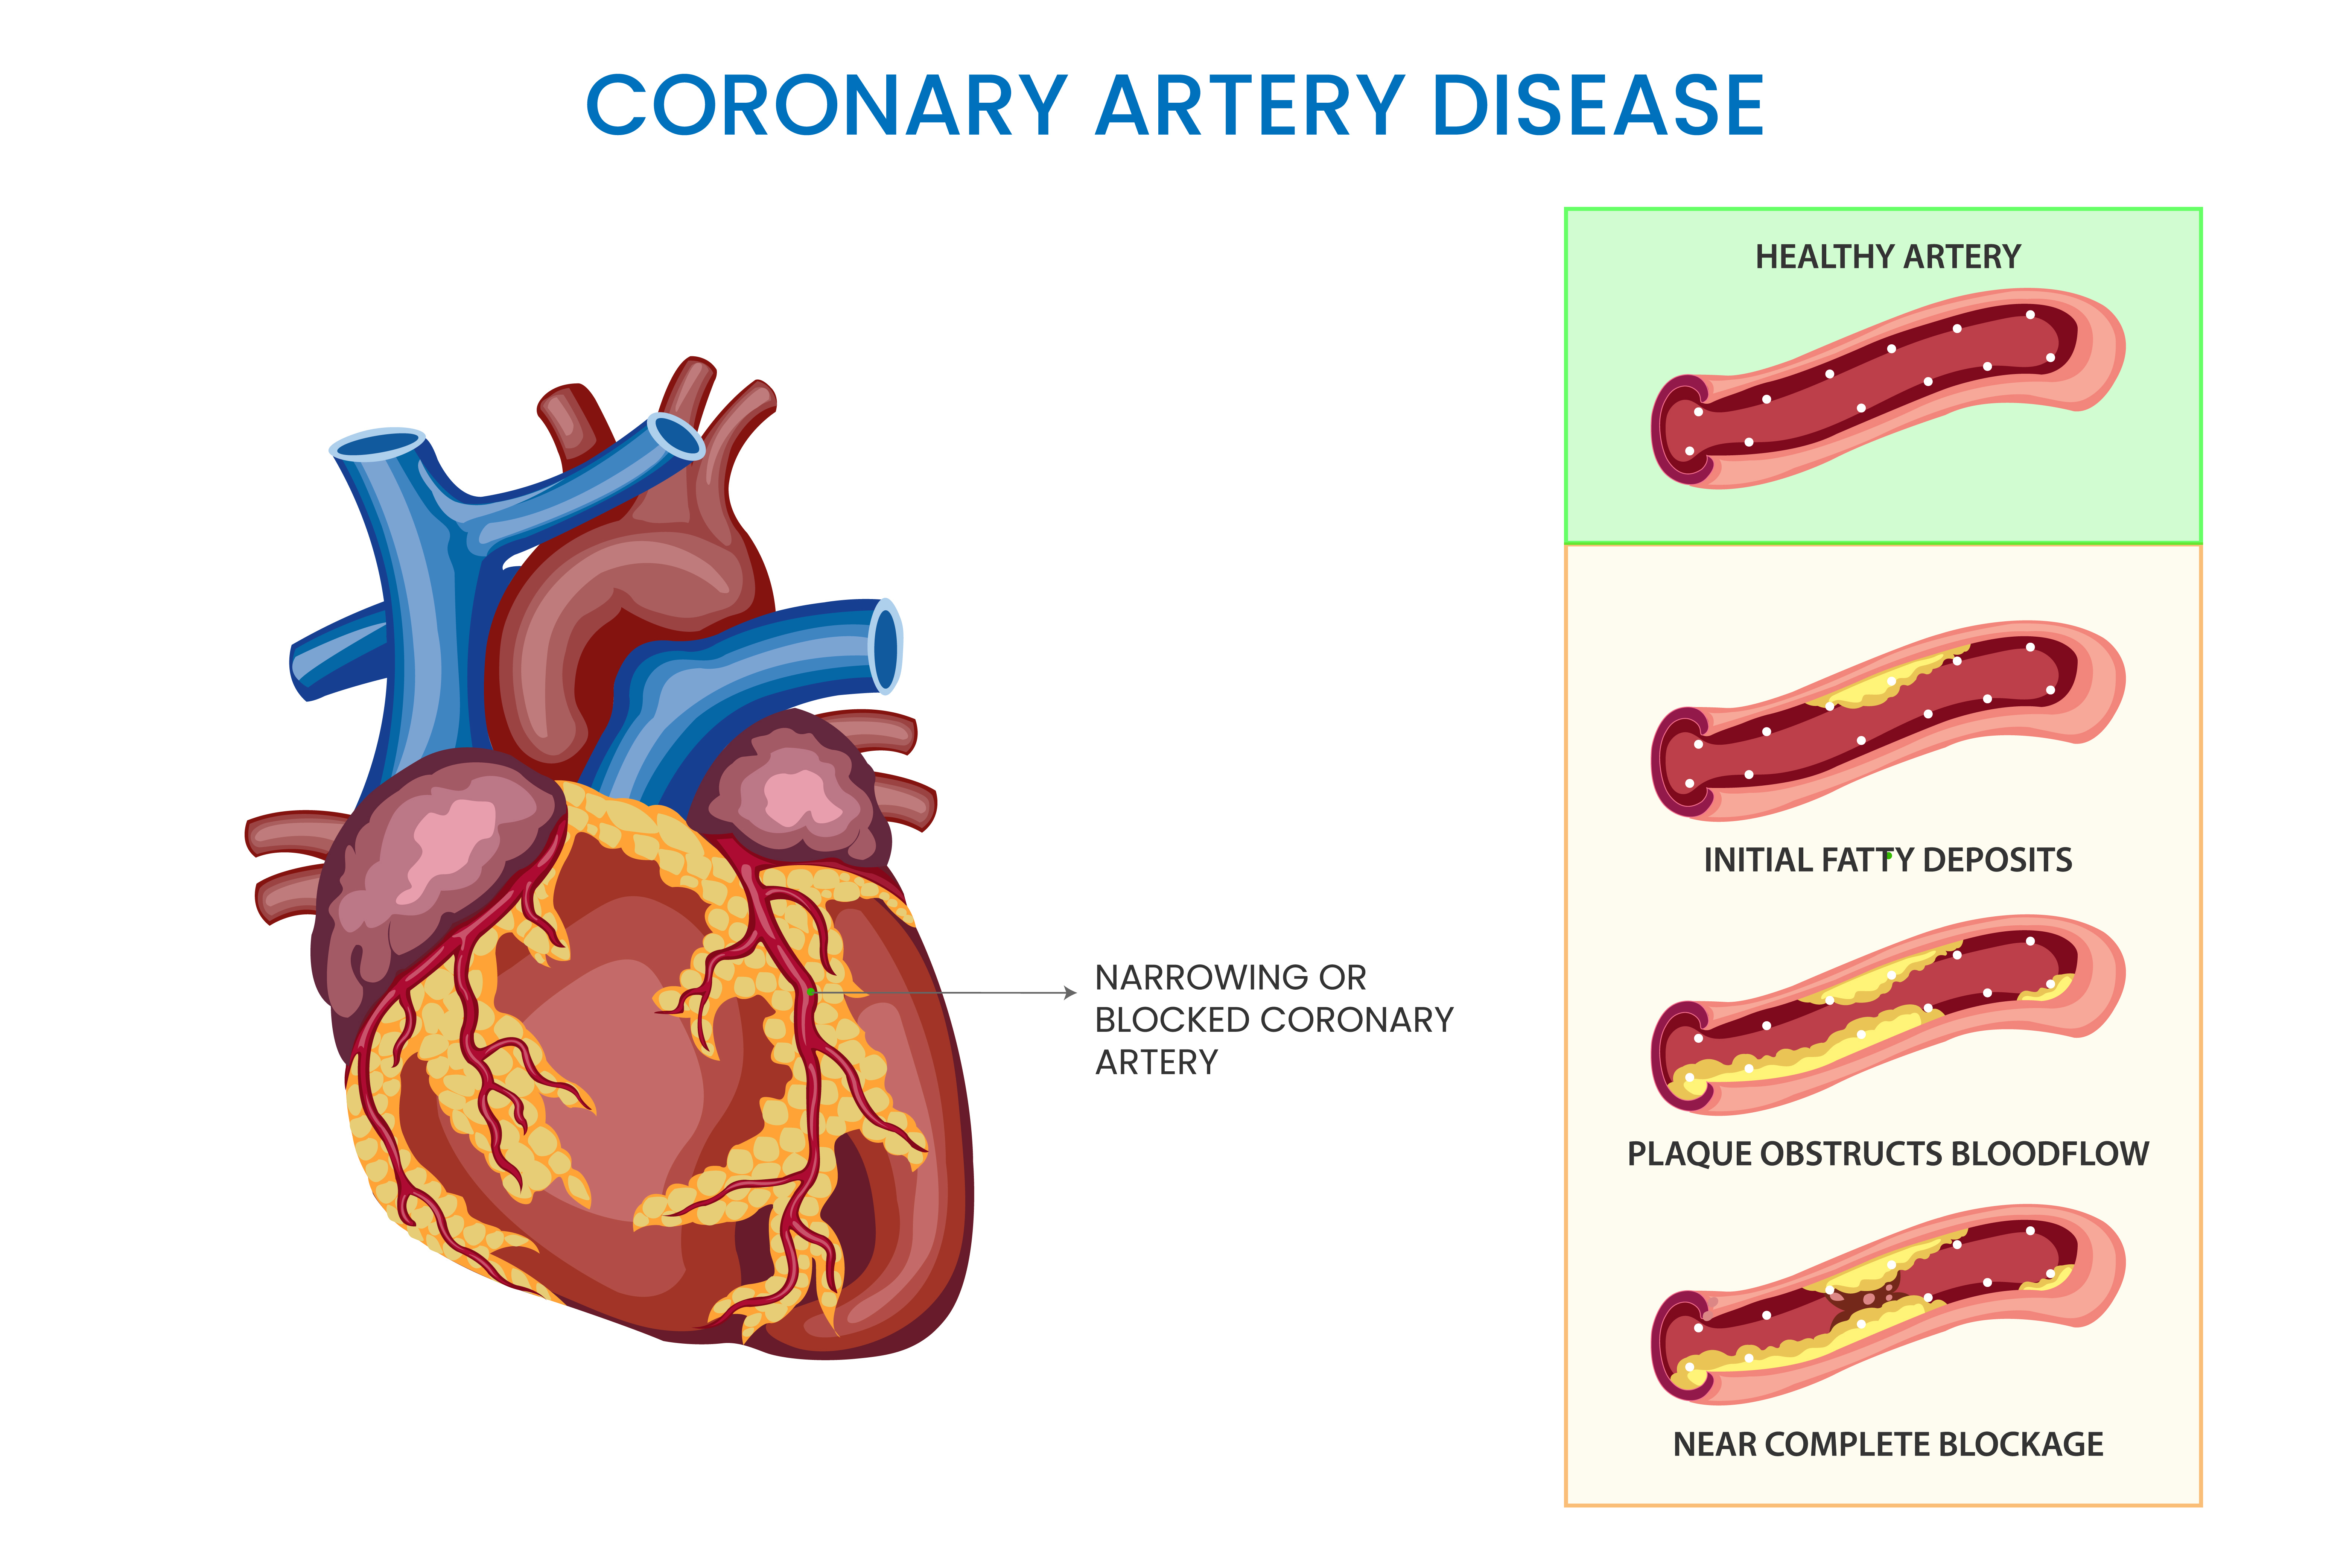

Coronary artery disease is a common heart condition. The major blood vessels that supply the heart (coronary arteries) struggle to send enough blood, oxygen and nutrients to the heart muscle. Cholesterol deposits (plaques) in the heart arteries and inflammation are usually the cause of coronary artery disease.

Signs and symptoms of coronary artery disease occur when the heart doesn't get enough oxygen-rich blood. If you have coronary artery disease, reduced blood flow to the heart can cause chest pain (angina) and shortness of breath. A complete blockage of blood flow can cause a heart attack.

Coronary artery disease often develops over decades. Symptoms may go unnoticed until a significant blockage causes problems or a heart attack occurs. Following a heart-healthy lifestyle can help prevent coronary artery disease.

Coronary artery disease may also be called coronary heart disease.

<a id="2"></a>
<h1 style="background-color:pink;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;"> Importing Libraries & Loading the Data</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import label_binarize
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, cohen_kappa_score, make_scorer

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [4]:
df = pd.read_csv(r"C:\Users\user\Desktop\heart disease dataset.csv")

<a id="2"></a>
<h1 style="background-color:pink;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;"> Exploratory Data Analysis</h1>

In [5]:
print(f'No. of records are {df.shape[0]}')
print(f'No. of columns are {df.shape[1]}')

No. of records are 918
No. of columns are 12


In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [8]:
column = list(df.columns)
categorical_features = []
continous_features = []

for i in column:
    if len(df[i].unique()) > 6:
        continous_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Continous Features :',*continous_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Continous Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
for column in df.columns:
    number_of_distinct_values = len(df[column].unique())
    print(f"{column}: {number_of_distinct_values} distinct values")

Age: 50 distinct values
Sex: 2 distinct values
ChestPainType: 4 distinct values
RestingBP: 67 distinct values
Cholesterol: 222 distinct values
FastingBS: 2 distinct values
RestingECG: 3 distinct values
MaxHR: 119 distinct values
ExerciseAngina: 2 distinct values
Oldpeak: 53 distinct values
ST_Slope: 3 distinct values
HeartDisease: 2 distinct values


In [11]:
round(df.describe())

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
count  918.0      918.0        918.0      918.0  918.0    918.0         918.0
mean    54.0      132.0        199.0        0.0  137.0      1.0           1.0
std      9.0       19.0        109.0        0.0   25.0      1.0           0.0
min     28.0        0.0          0.0        0.0   60.0     -3.0           0.0
25%     47.0      120.0        173.0        0.0  120.0      0.0           0.0
50%     54.0      130.0        223.0        0.0  138.0      1.0           1.0
75%     60.0      140.0        267.0        0.0  156.0      2.0           1.0
max     77.0      200.0        603.0        1.0  202.0      6.0           1.0

In [12]:
# Find and count duplicate records if any
duplicate_records = df[df.duplicated()]
num_duplicates = len(duplicate_records)

print("Number of duplicate records:", num_duplicates)

Number of duplicate records: 0


In [13]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Target Distribution</h3>

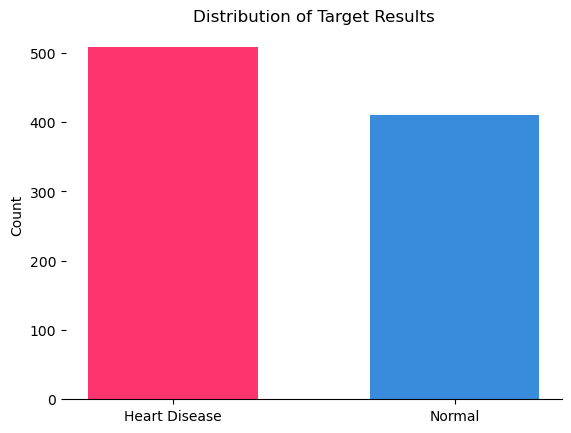

Number of records : 
Heart Disease: 508
Normal: 410


In [14]:
fig, ax = plt.subplots()

# Count the occurrences of each class
class_counts = df['HeartDisease'].value_counts()

# Define the x-axis labels and colors
labels = ['Heart Disease', 'Normal']
colors = ['#fe346e', '#398bdb']

# Create a bar plot
plt.bar(labels, class_counts.values, color=colors, width = 0.6)

# Add labels and title
plt.xlabel('')
plt.ylabel('Count')
plt.title('Distribution of Target Results')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Display the plot
plt.show()

# Print the number of samples for each class
print ("Number of records : ")
for label, count in zip(labels, class_counts.values):
    print(f'{label}: {count}')

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Exploring Continuous Variables</h3>

In [15]:
def explore_continuous_variable(feature, data=df):
    # Extract the column from the dataset
    column = data[feature]
    
    # Data type
    data_type = column.dtype
    
    # Basic statistics
    minimum = int(column.min())
    maximum = int(column.max())
    data_range = maximum - minimum
    mean = round(column.mean())
    median = int(column.median())
    q3 = int(column.quantile(0.75))
    q1 = int(column.quantile(0.25))
    iqr = q3 - q1
    variance = round(column.var(), 2)
    std_deviation = round(column.std(), 2)
    coefficient_of_variation = round(np.sqrt(variance) / mean, 2)
    skewness = round(column.skew(), 2)
    
    # Percentiles
    percentiles = column.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
    
    # Number of null values
    num_null_values = column.isnull().sum()
    
    # Calculate outliers based on IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = round(((column < lower_bound) | (column > upper_bound)).mean() * 100, 2)
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistics': ['Feature', 'Data Type', 'Minimum Value', 'Maximum Value', 'Range', 'Mean', 'Median', 'Q3', 'Q1',
                       'IQR', 'Outliers Percentage', 'Variance', 'Standard Deviation', 'Coefficient of Variation', 'Skewness',
                       '10th Percentile', '25th Percentile', '50th Percentile', '75th Percentile', '90th Percentile',
                       'Number of Null Values','Lower Band' , 'Upper Band'],
        'Values': [feature, data_type, minimum, maximum, data_range, mean, median, q3, q1, iqr, outliers_percentage, variance, std_deviation,
                   coefficient_of_variation, skewness, int(percentiles['10%']), int(percentiles['25%']),
                   int(percentiles['50%']), int(percentiles['75%']), int(percentiles['90%']), num_null_values , lower_bound , upper_bound  
                   ]
    })
    
    results_df = results_df.reset_index(drop=True)
    
    # Create a Styler object
    styled_df = results_df.style.set_properties(**{'text-align': 'center'})
    
    return styled_df

In [16]:
def plot_distribution(df, feature, plot_title):
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        # Histogram
        sns.histplot(x=feature,
                     data=df, 
                     ax=ax[0],
                     linewidth=0.8,
                     color='#875692',
                     bins=20).set_title(f"Distribution of {plot_title}")
        ax[0].set_xlabel(plot_title)

        # Box plot for the entire distribution
        sns.boxplot(x=feature,
                    data=df,
                    linewidth=1.5,
                    width=0.5,
                    color='#875692',
                    ax=ax[1]).set_title(f"Box Plot of {plot_title}")
        ax[1].set_xlabel(plot_title)

        plt.show()

In [17]:
def compare_feature_statistics(feature, data=df):
    # Extract the column for CHD and Healthy individuals
    HeartDisease_column = data[data['HeartDisease'] == 1][feature]
    healthy_column = data[data['HeartDisease'] == 0][feature]

    # Basic statistics for CHD
    HeartDisease_mean = int(HeartDisease_column.mean())
    HeartDisease_median = int(HeartDisease_column.median())
    HeartDisease_std_deviation = round(HeartDisease_column.std(), 2)
    HeartDisease_min = int(HeartDisease_column.min())
    HeartDisease_max = int(HeartDisease_column.max())
    HeartDisease_iqr = int(HeartDisease_column.quantile(0.75) - HeartDisease_column.quantile(0.25))

    # Basic statistics for Healthy
    healthy_mean = int(healthy_column.mean())
    healthy_median = int(healthy_column.median())
    healthy_std_deviation = round(healthy_column.std(), 2)
    healthy_min = int(healthy_column.min())
    healthy_max = int(healthy_column.max())
    healthy_iqr = int(healthy_column.quantile(0.75) - healthy_column.quantile(0.25))

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistics': ['Mean', 'Median', 'Std Deviation', 'Min', 'Max', 'IQR'],
        'Heart Disease': [HeartDisease_mean, HeartDisease_median, HeartDisease_std_deviation, HeartDisease_min, HeartDisease_max, HeartDisease_iqr],
        'Healthy': [healthy_mean, healthy_median, healthy_std_deviation, healthy_min, healthy_max, healthy_iqr]
    })

    results_df = results_df.set_index('Statistics')
    
    results_df = results_df.astype(int)

    # Create a Styler object
    styled_df = results_df.style.set_properties(**{'text-align': 'center'})

    return styled_df

In [18]:
df['isHeartDisease'] = df['HeartDisease'].map({1: 'Heart Disease', 0: 'Healthy'})
def plot_CHD_vs_Healthy(feature, plot_title, df = df):
    box_plots_colors = {'Healthy': '#398bdb', 'Heart Disease':'#fe346e'}
    
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        # KDE plot for CHD vs Healthy
        sns.kdeplot(data=df[df['isHeartDisease']=='Heart Disease'], x=feature, color='#fe346e', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])
        sns.kdeplot(data=df[df['isHeartDisease']=='Healthy'], x=feature, color='#398bdb', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])

        ax[0].set_title(f"KDE Plot of {plot_title} by Heart Disease")
        ax[0].set_xlabel(plot_title)
        ax[0].set_ylabel('Density')

        # Box plot for CHD vs Healthy
        sns.boxplot(x=feature,
                    data=df,
                    y="isHeartDisease",
                    linewidth=1.5,
                    palette=box_plots_colors,
                    ax=ax[1]).set_title(f"Distribution of {plot_title} by Heart Disease")
        ax[1].set_xlabel(plot_title)
        ax[1].set_ylabel('Heart Disease')

        plt.show()

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Age</h3>

In [19]:
explore_continuous_variable('Age')

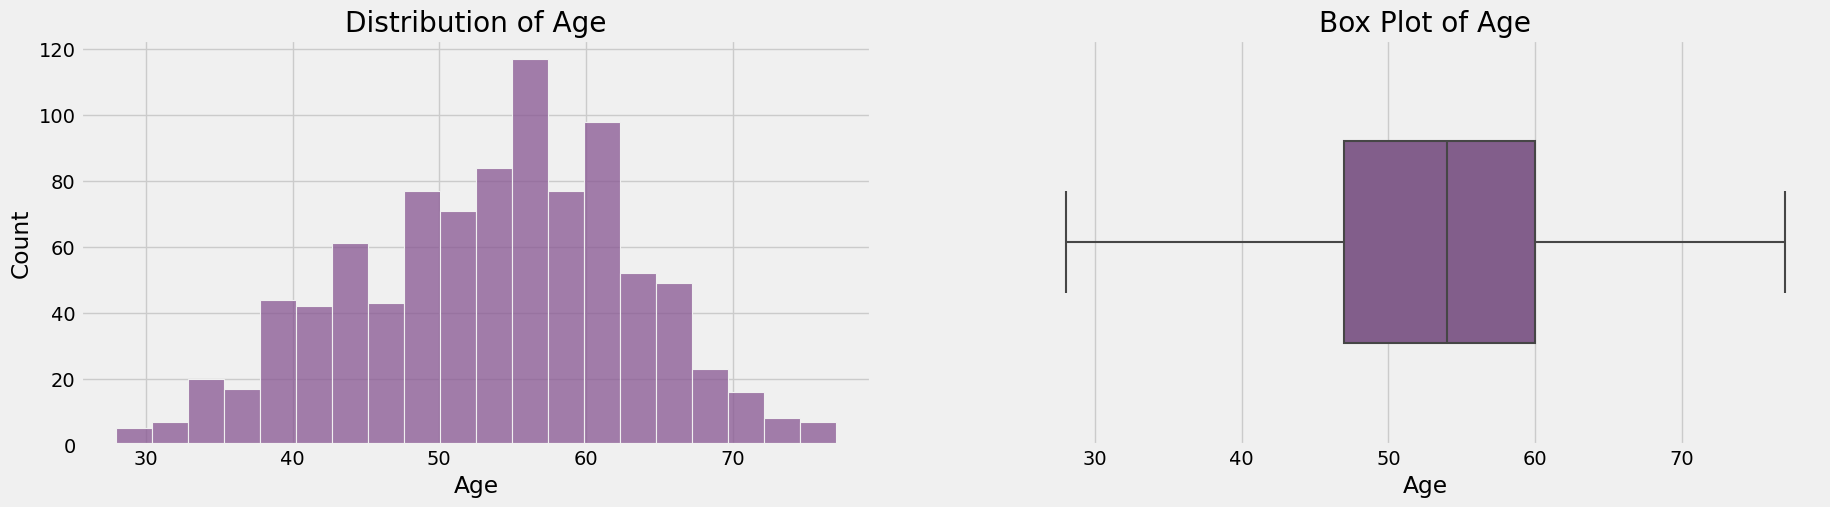

In [20]:
plot_distribution(df, 'Age', 'Age')

In [21]:
compare_feature_statistics('Age')

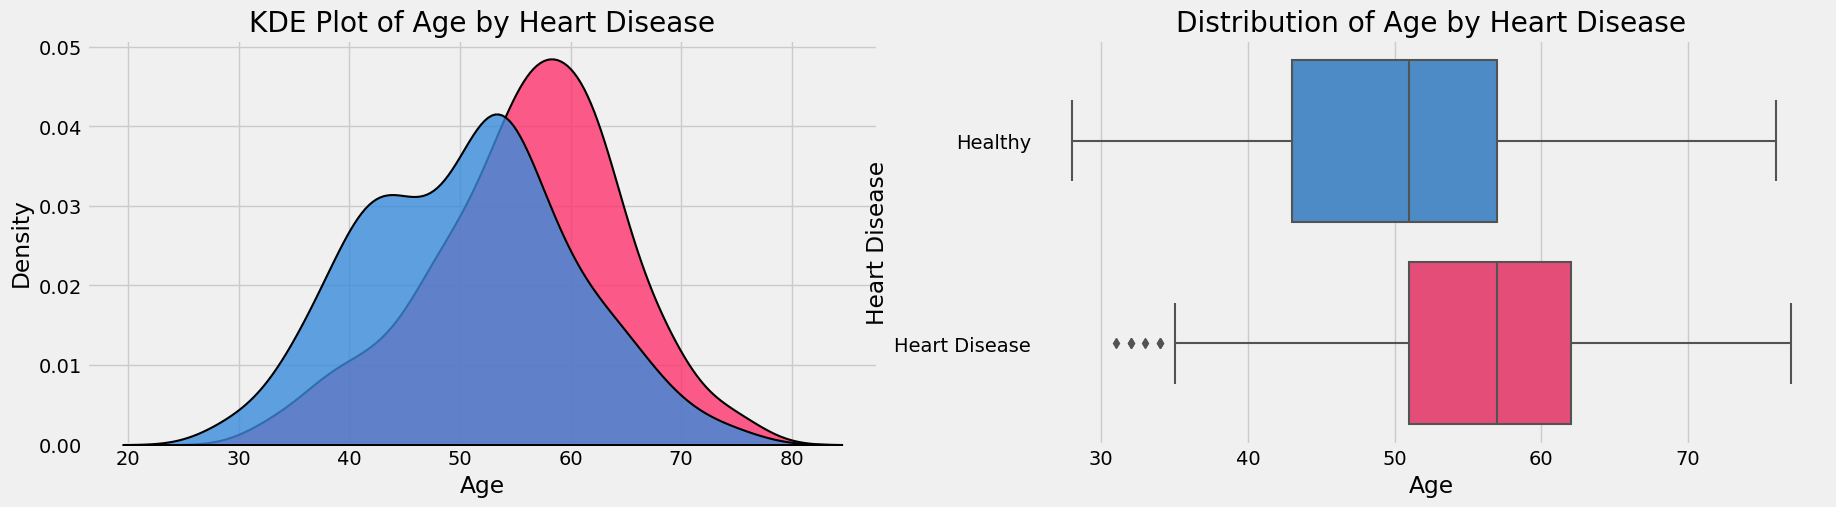

In [22]:
plot_CHD_vs_Healthy("Age", "Age")

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Cholesterol</h3>

In [23]:
explore_continuous_variable('Cholesterol')

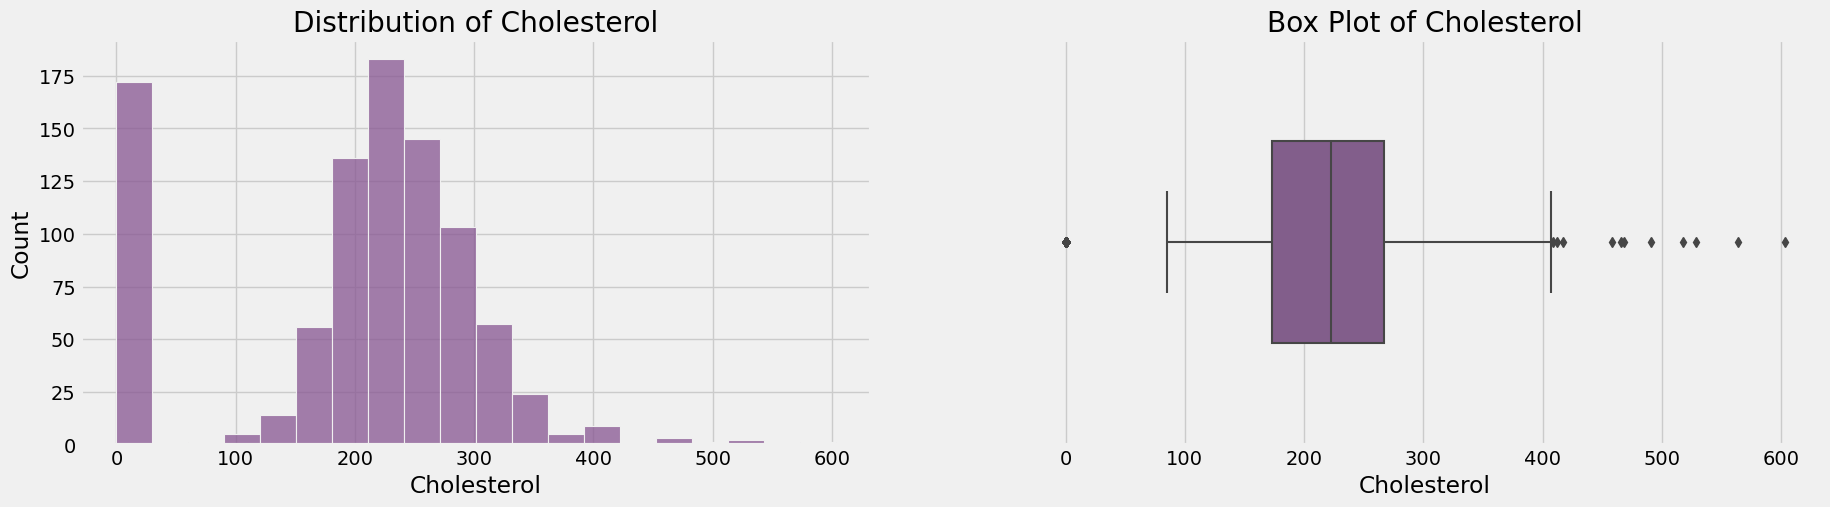

In [24]:
plot_distribution(df, 'Cholesterol', 'Cholesterol')

In [25]:
compare_feature_statistics('Cholesterol')

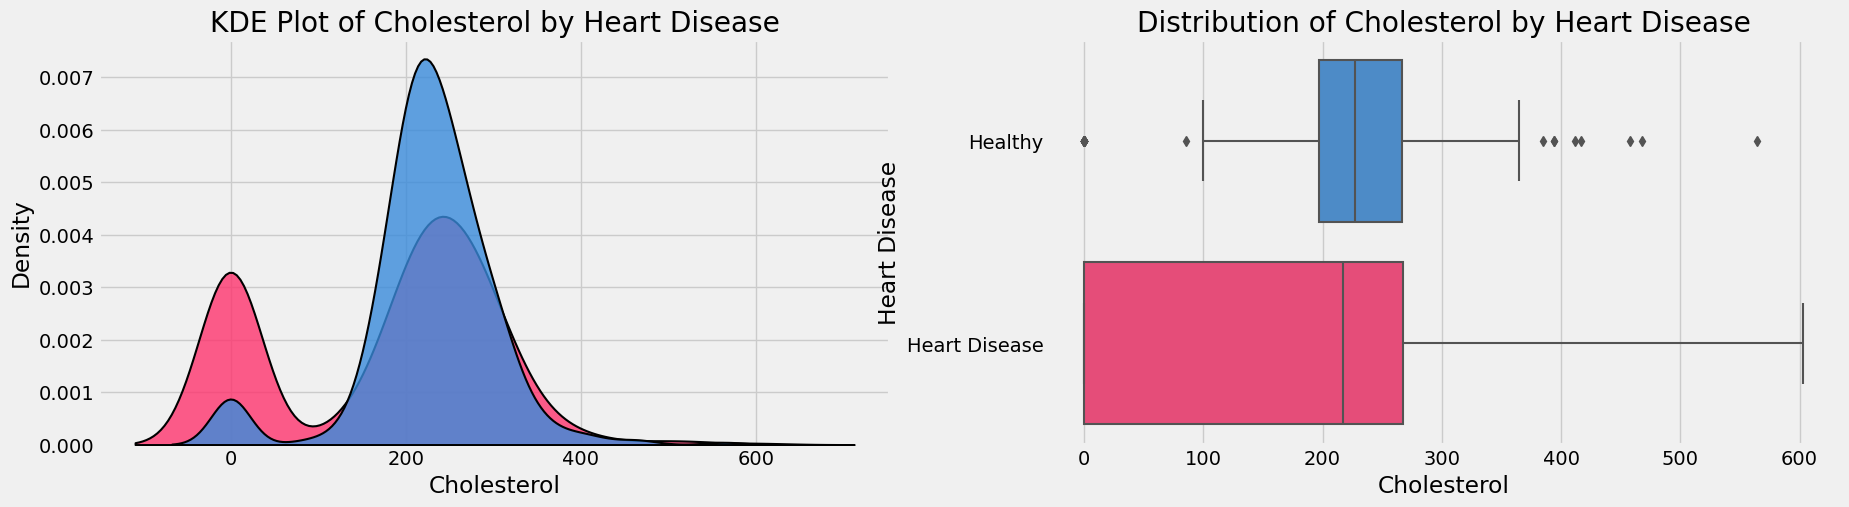

In [26]:
plot_CHD_vs_Healthy("Cholesterol", "Cholesterol")

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Max Heart Rate</h3>

In [27]:
explore_continuous_variable('MaxHR')

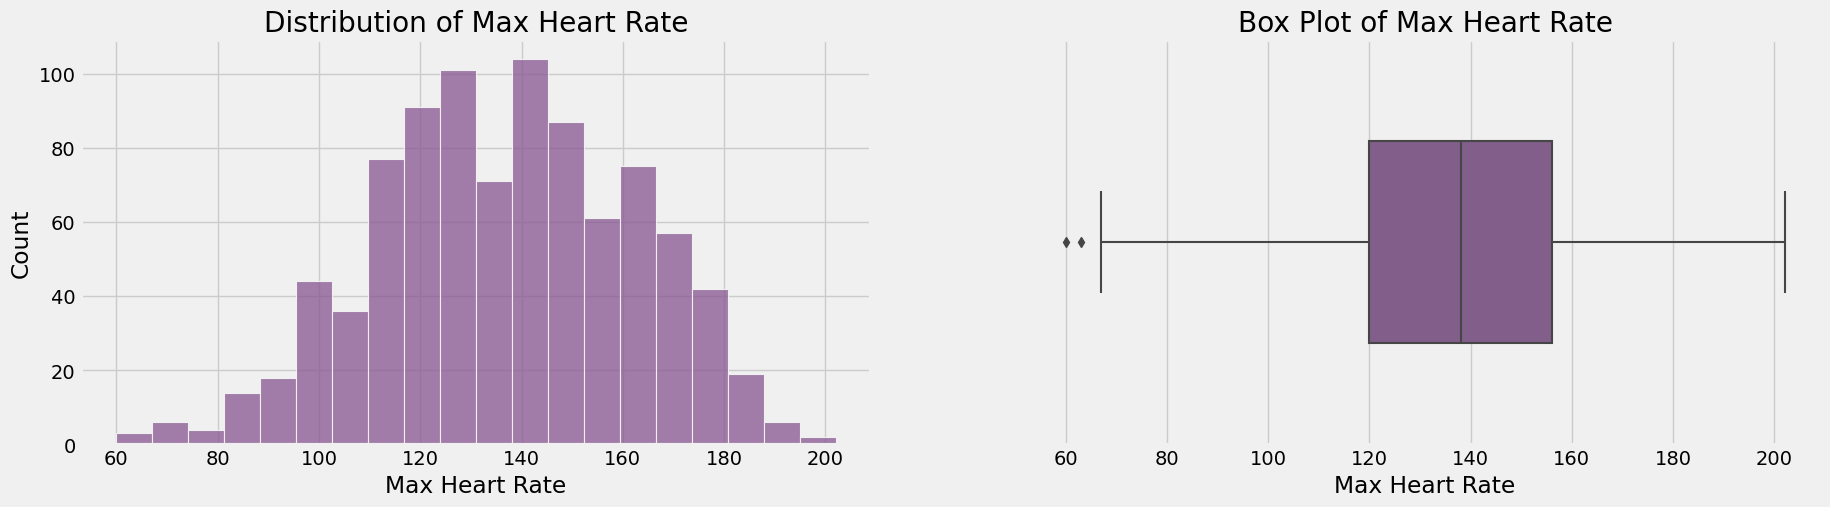

In [28]:
plot_distribution(df, 'MaxHR', 'Max Heart Rate')

In [29]:
compare_feature_statistics('MaxHR')

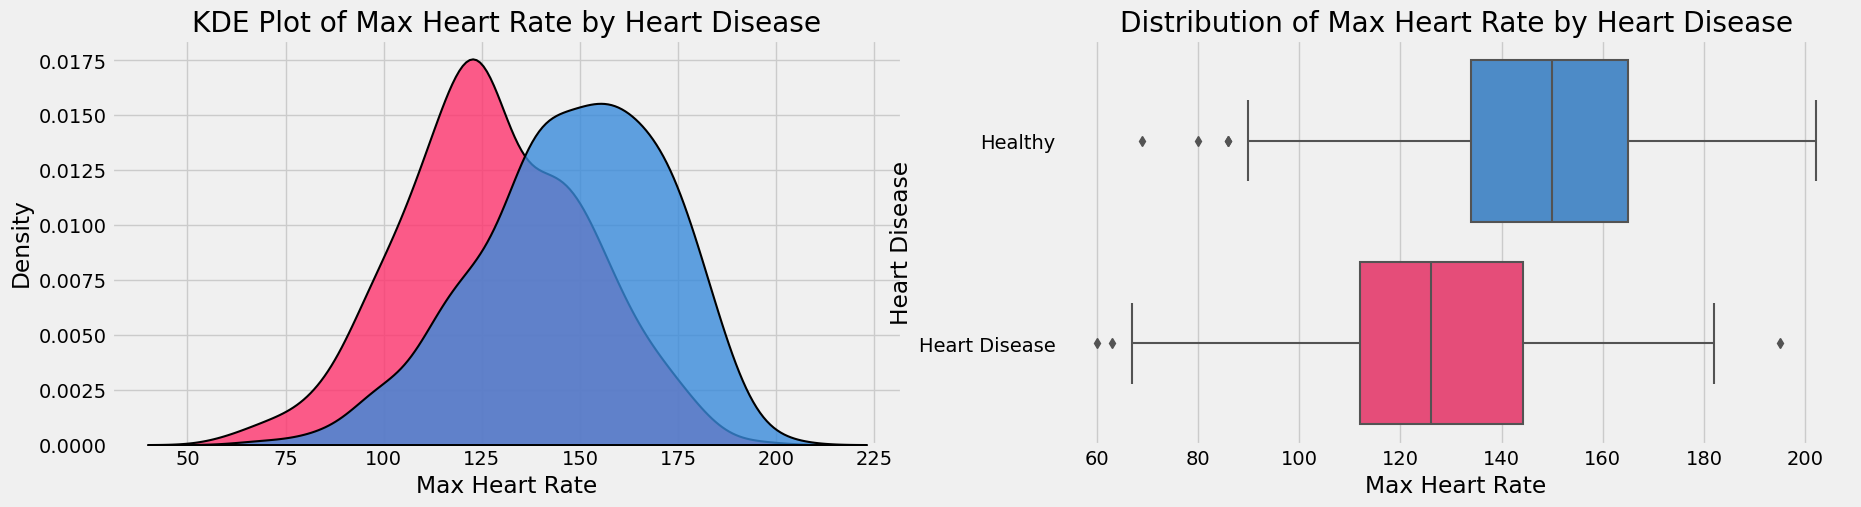

In [30]:
plot_CHD_vs_Healthy("MaxHR", "Max Heart Rate")

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Resting Blood Pressure</h3>

In [31]:
explore_continuous_variable('RestingBP')

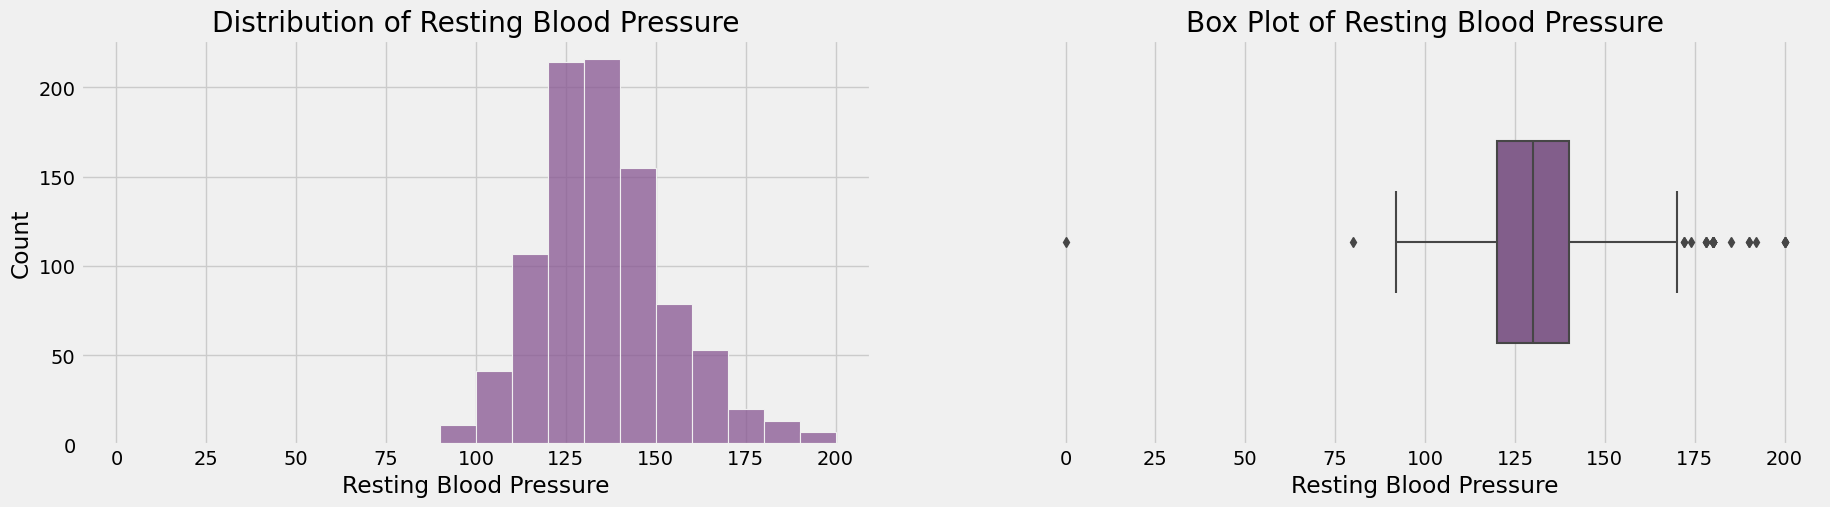

In [32]:
plot_distribution(df, 'RestingBP', 'Resting Blood Pressure')

In [33]:
compare_feature_statistics('RestingBP')

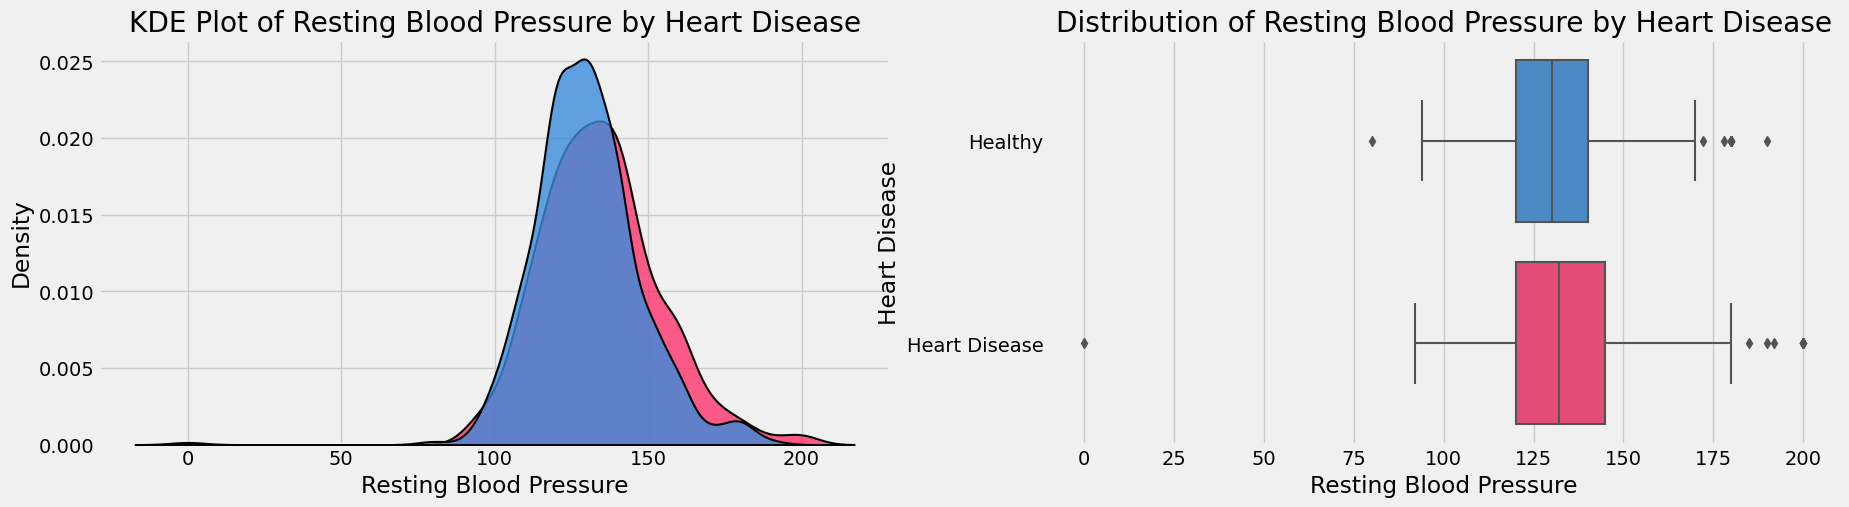

In [34]:
plot_CHD_vs_Healthy("RestingBP", "Resting Blood Pressure")

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Old Peak</h3>

In [35]:
explore_continuous_variable('Oldpeak')

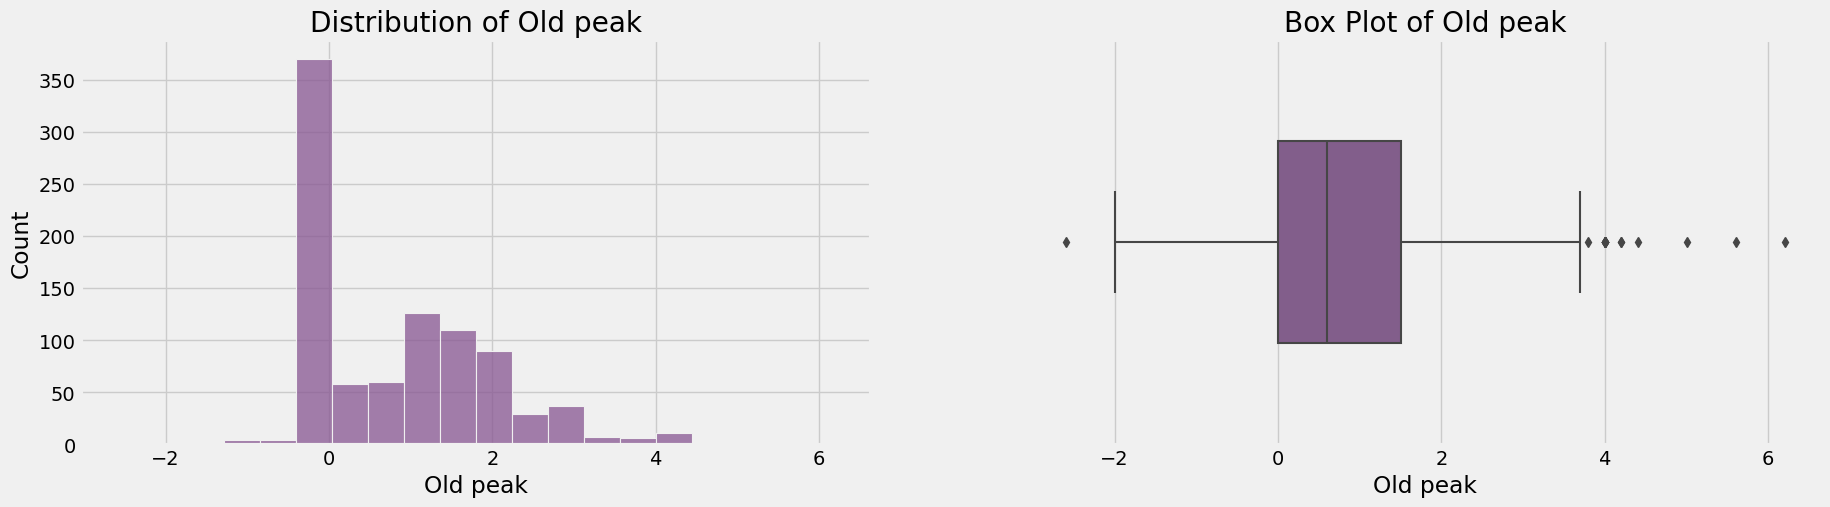

In [36]:
plot_distribution(df, 'Oldpeak', 'Old peak')

In [37]:
compare_feature_statistics('Oldpeak')

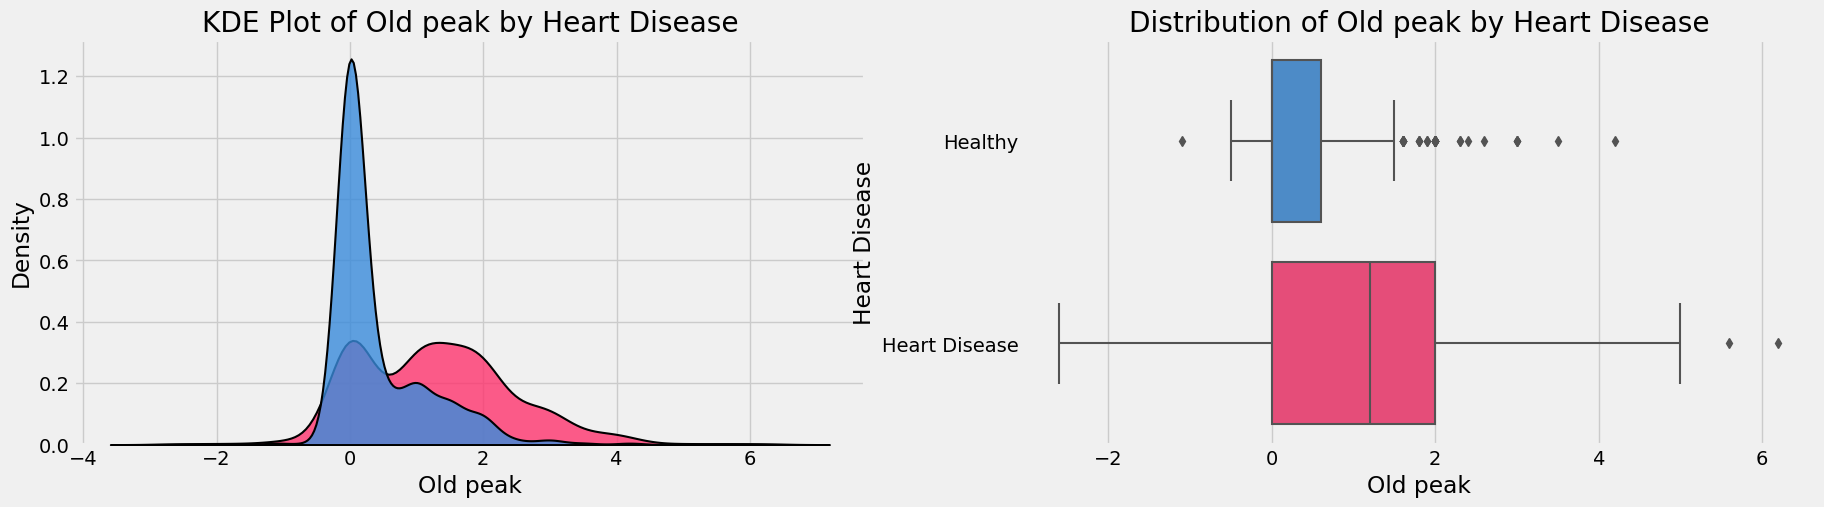

In [38]:
plot_CHD_vs_Healthy("Oldpeak", "Old peak")

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Outliers Handling Discussion</h3>

During our examination of the dataset, we observed the presence of outliers in various features, as indicated by statistical measures such as box plots and histograms we have built before. These outliers were defined as values that **exceeded the range of Q3 + 1.5 IQR (interquartile range) or were below Q1 - 1.5 IQR**. However, we subsequently engaged in discussions with domain experts in the medical field to gain a deeper understanding of these outliers.

The insights provided by **medical domain experts** played a crucial role in our decision-making process. We learned that the outliers we initially identified actually represent valid and plausible data points that **can exist in the real world. These values are not errors or noise but rather reflect extreme occurrences** that can contribute to a comprehensive understanding of the factors associated with CAD.

Based on these discussions and the validation of the outliers, we have made the **informed decision to retain them in our analysis**.

By doing so, we aim to **capture the full range of real-world scenarios and avoid introducing bias into our findings**.

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Exploring Categorical Variables</h3>

In [39]:
def explore_categorical_variable(feature, data = df):
    # Extract the column from the dataset
    column = data[feature]
    
    # Data type
    data_type = column.dtype
    
    # Count of each category
    count = column.count()
    
    # Mode (most frequent category)
    mode = column.mode().iloc[0]
    
    unique_values = column.nunique()
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistics': ['Data Type', 'Count', 'Mode', 'Num of Possible values'],
        'Values': [data_type, count,  mode , unique_values ]
    })
    
    # Remove the index column
    results_df = results_df.reset_index(drop=True)
    
    return results_df

In [40]:
df['FastingBS'] = df['FastingBS'].map({0: 'Healthy', 1: 'Diabetes'})
def plot_categorical_distribution(df, column_name, labels=None, colors=None):
    fig, ax = plt.subplots(figsize = (6,6))
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')
    class_counts = df[column_name].value_counts()

    if labels is None:
        labels = class_counts.index

    if colors is None:
        colors = [ '#398bdb', '#fe346e']

    # Create a bar plot
    plt.bar(labels, class_counts.values, color=colors, width=0.6)

    # Add labels and title
    plt.xlabel('')
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Display the plot
    plt.show()

    # Print the number of samples for each category
    print("Number of records : ")
    for label, count in zip(labels, class_counts.values):
        print(f'{label}: {count}')

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Gender</h3>

In [41]:
explore_categorical_variable('Sex')

Statistics  Values
0               Data Type  object
1                   Count     918
2                    Mode       M
3  Num of Possible values       2

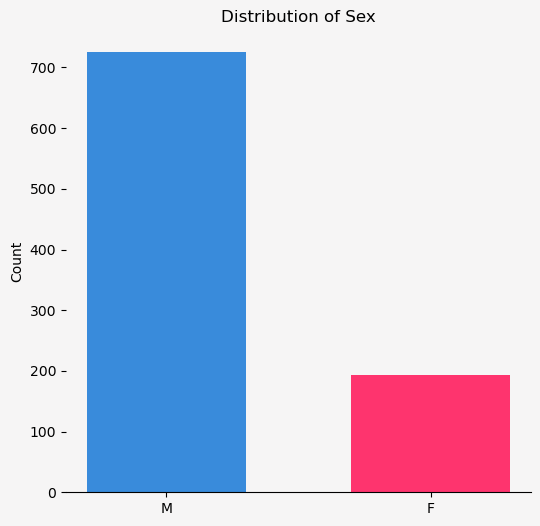

Number of records : 
M: 725
F: 193


In [42]:
plot_categorical_distribution(df, 'Sex')

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Chest Pain Type</h3>

In [43]:
explore_categorical_variable('ChestPainType')

Statistics  Values
0               Data Type  object
1                   Count     918
2                    Mode     ASY
3  Num of Possible values       4

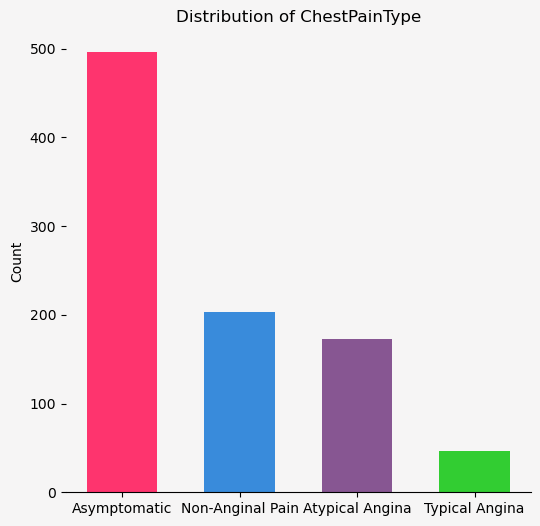

Number of records : 
Asymptomatic: 496
Non-Anginal Pain: 203
Atypical Angina: 173
Typical Angina: 46


In [44]:
# Using custom labels and colors
custom_labels = ['Asymptomatic', 'Non-Anginal Pain', 'Atypical Angina', 'Typical Angina']
custom_colors = ['#fe346e', '#398bdb', '#875692', '#32cd32']
plot_categorical_distribution(df, 'ChestPainType', labels=custom_labels, colors=custom_colors)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Fasting Blood Sugar</h3>

In [45]:
explore_categorical_variable('FastingBS')

Statistics   Values
0               Data Type   object
1                   Count      918
2                    Mode  Healthy
3  Num of Possible values        2

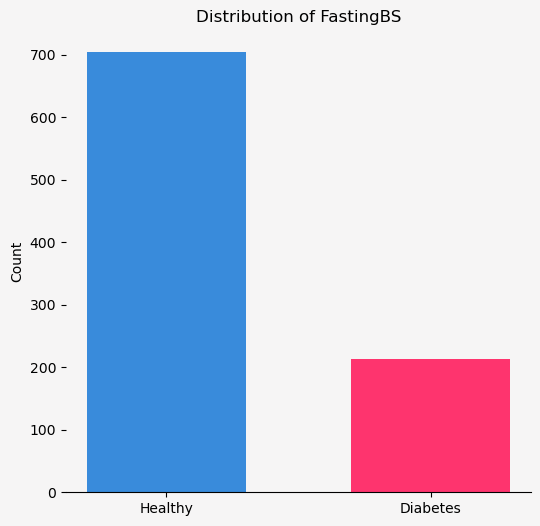

Number of records : 
Healthy: 704
Diabetes: 214


In [46]:
plot_categorical_distribution(df, 'FastingBS')

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">ST Slope</h3>

In [47]:
explore_categorical_variable('ST_Slope')

Statistics  Values
0               Data Type  object
1                   Count     918
2                    Mode    Flat
3  Num of Possible values       3

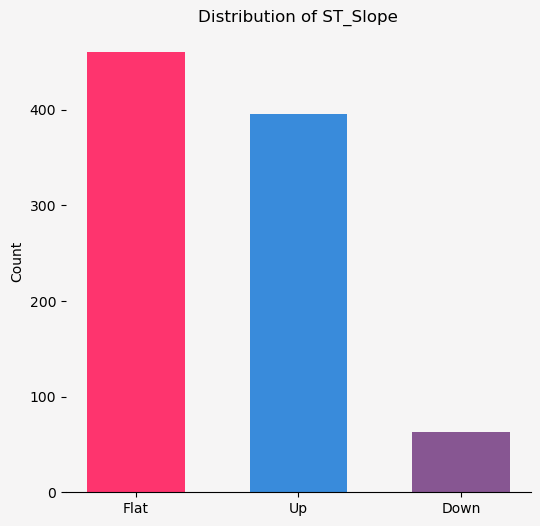

Number of records : 
Flat: 460
Up: 395
Down: 63


In [48]:
# Using custom colors
custom_colors = ['#fe346e', '#398bdb', '#875692']
plot_categorical_distribution(df, 'ST_Slope', colors = custom_colors)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Excercise Angina</h3>

In [49]:
explore_categorical_variable('ExerciseAngina')

Statistics  Values
0               Data Type  object
1                   Count     918
2                    Mode       N
3  Num of Possible values       2

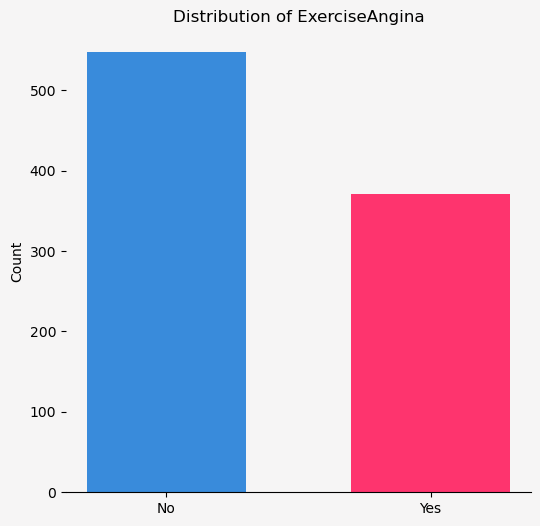

Number of records : 
No: 547
Yes: 371


In [50]:
# Using custom labels and colors
custom_labels = ['No', 'Yes']
custom_colors = ['#398bdb', '#fe346e']
plot_categorical_distribution(df, 'ExerciseAngina', labels=custom_labels, colors=custom_colors)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Resting ECG</h3>

In [51]:
explore_categorical_variable('RestingECG')

Statistics  Values
0               Data Type  object
1                   Count     918
2                    Mode  Normal
3  Num of Possible values       3

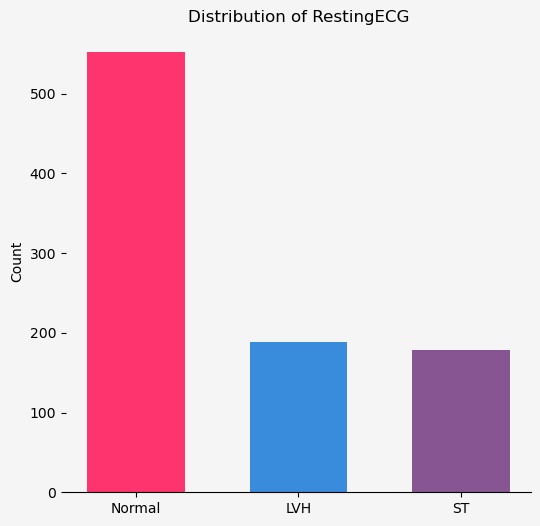

Number of records : 
Normal: 552
LVH: 188
ST: 178


In [52]:
# Using custom colors
custom_colors = ['#fe346e', '#398bdb', '#875692']
plot_categorical_distribution(df, 'RestingECG', colors = custom_colors)

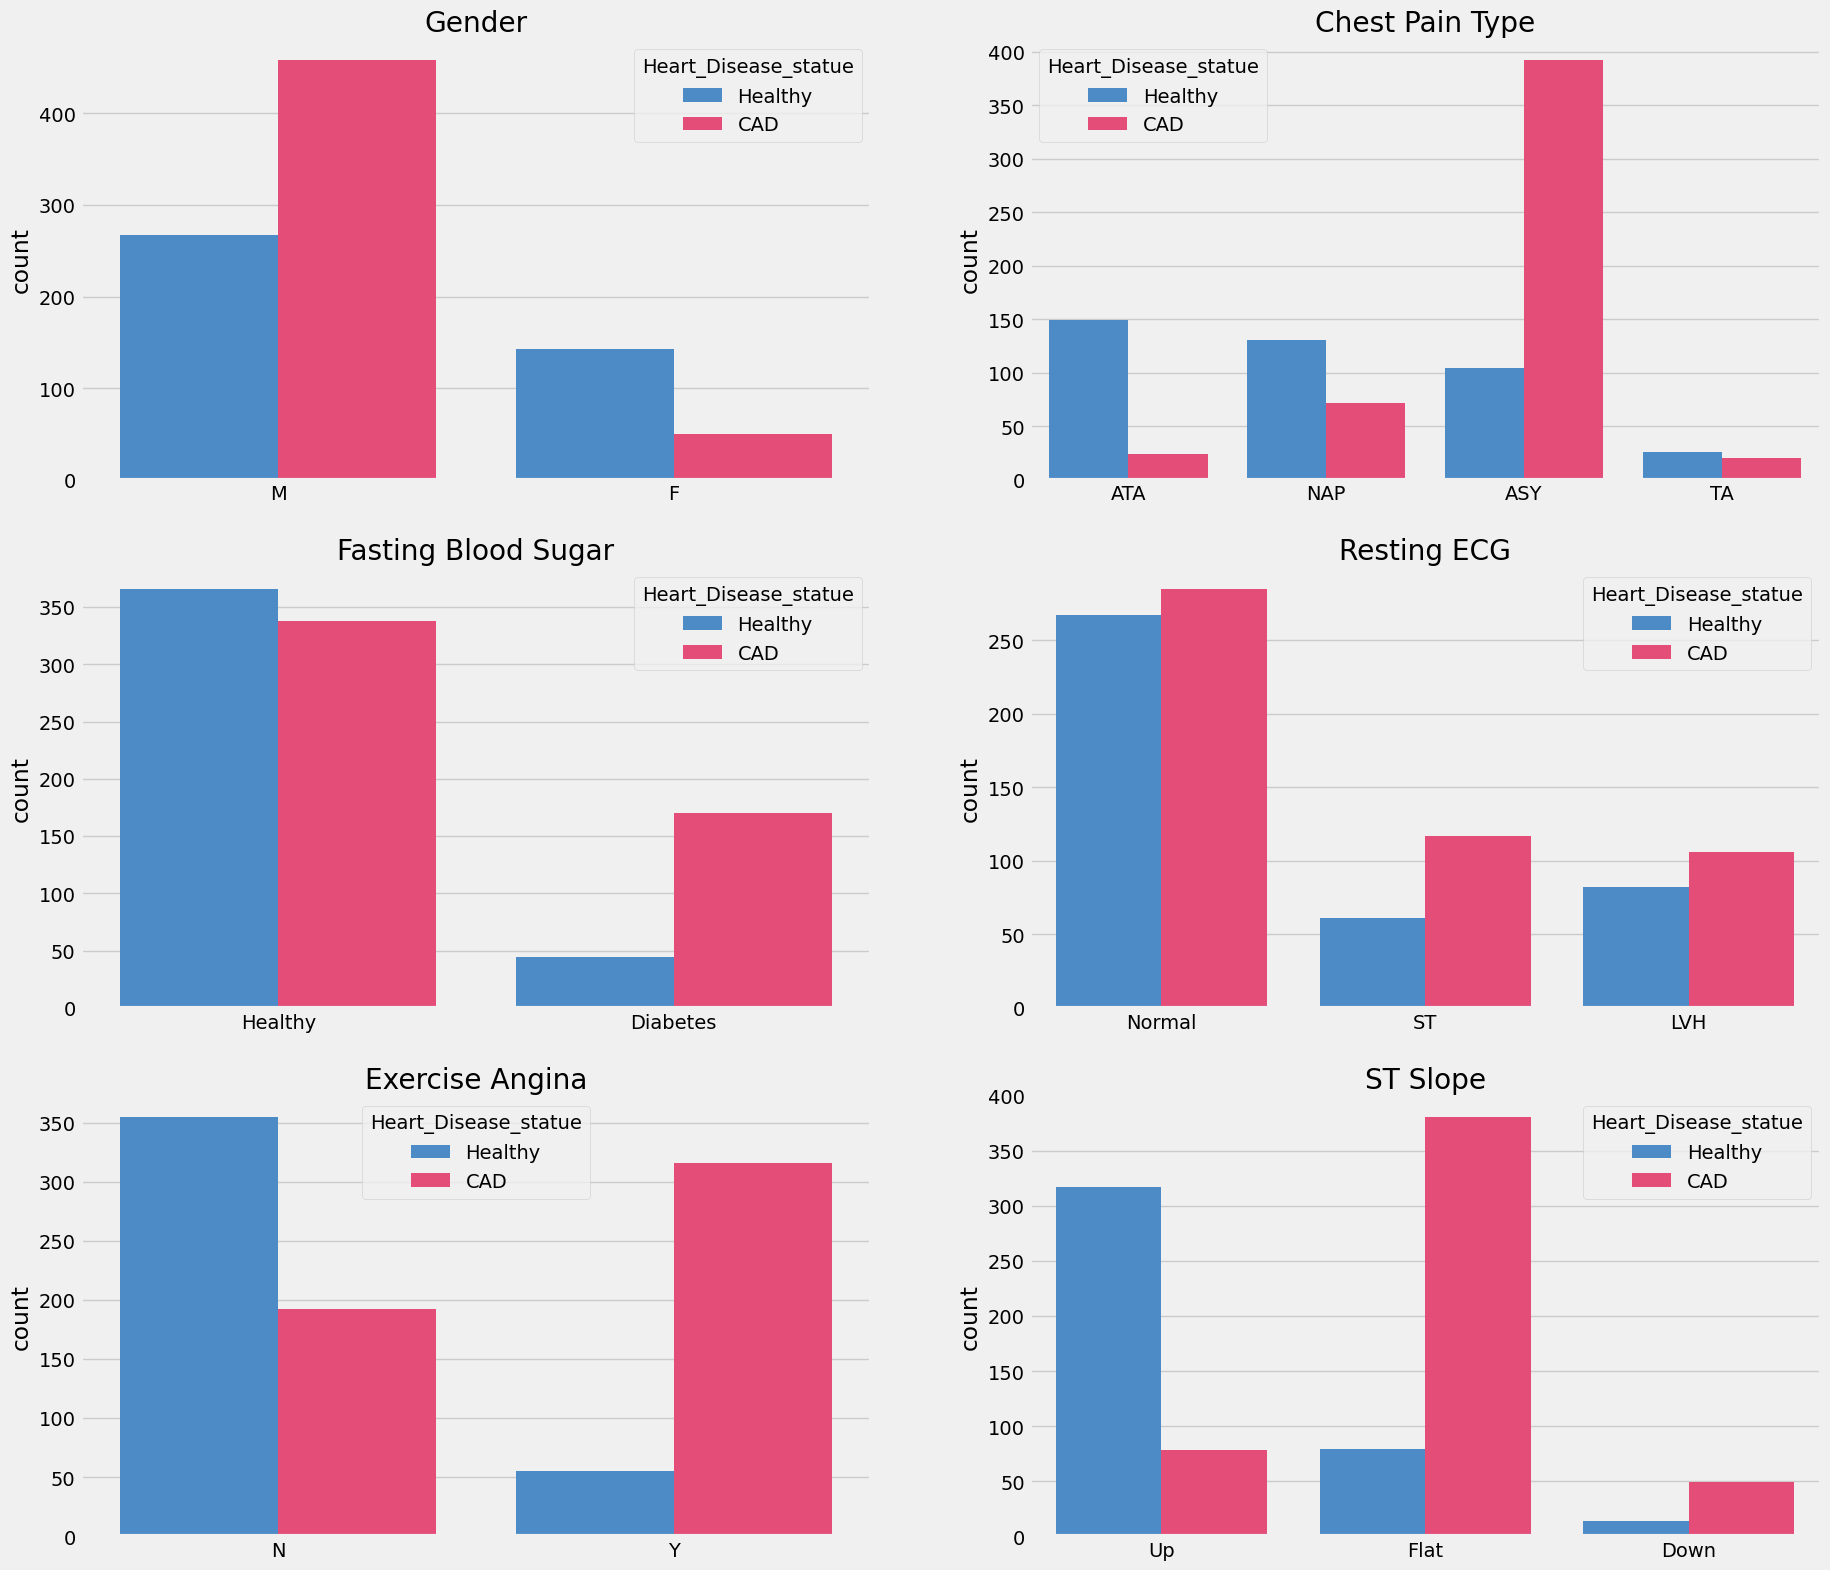

In [53]:
df['Heart_Disease_statue'] = df['HeartDisease'].map({1: 'CAD', 0: 'Healthy'})

with plt.style.context('fivethirtyeight'):
    

    plt.figure(figsize = (20,25))

    custom_palette = {'Healthy': '#398bdb', 'CAD':'#fe346e'}
    
    plt.subplot(4,2,1)
    plt.gca().set_title('Gender')
    sns.countplot(x = df['Sex'], hue=df['Heart_Disease_statue'], palette=custom_palette)
    plt.gca().set_xlabel('') 

    plt.subplot(4,2,2)
    plt.gca().set_title('Chest Pain Type')
    sns.countplot(x = df['ChestPainType'], hue=df['Heart_Disease_statue'], palette=custom_palette)
    plt.gca().set_xlabel('')
    
    plt.subplot(4,2,3)
    plt.gca().set_title('Fasting Blood Sugar')
    sns.countplot(x = df['FastingBS'], hue=df['Heart_Disease_statue'], palette=custom_palette )
    plt.gca().set_xlabel('')
    
    plt.subplot(4,2,4)
    plt.gca().set_title('Resting ECG')
    sns.countplot(x = df['RestingECG'], hue=df['Heart_Disease_statue'], palette=custom_palette )
    plt.gca().set_xlabel('')
    
    plt.subplot(4,2,5)
    plt.gca().set_title('Exercise Angina')
    sns.countplot(x = df['ExerciseAngina'], hue=df['Heart_Disease_statue'], palette=custom_palette )
    plt.gca().set_xlabel('')
    
    plt.subplot(4,2,6)
    plt.gca().set_title('ST Slope')
    sns.countplot(x = df['ST_Slope'], hue=df['Heart_Disease_statue'], palette=custom_palette )
    plt.gca().set_xlabel('')

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Correlation Map</h3>

In [54]:
df_2 = pd.read_csv(r"C:\Users\user\Desktop\heart disease dataset.csv")

In [55]:
df_copy = df_2

In [56]:
df_copy['Sex'] = df_copy['Sex'].map({'M': 1, 'F': 0})
df_copy['ChestPainType'] = df_copy['ChestPainType'].map({'ATA': 1, 'NAP': 0, 'ASY':2, 'TA':3})
df_copy['ExerciseAngina'] = df_copy['ExerciseAngina'].map({'N': 0, 'Y': 1})
df_copy['ST_Slope'] = df_copy['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})
df_copy['RestingECG'] = df_copy['RestingECG'].map({'Normal': 0, 'ST': 1,'LVH':2})

<Axes: >

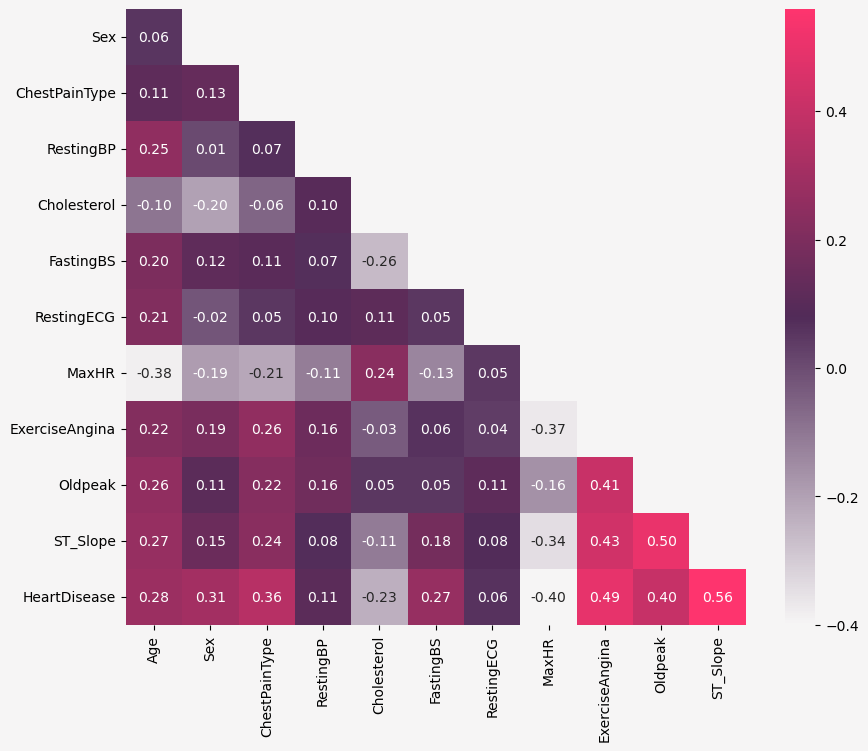

In [57]:
df_corr = df_copy.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))

fig, ax = plt.subplots(figsize = (10,8))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()


colors = ['#f6f5f5','#512b58','#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",cmap = colormap )

<a id="2"></a>
<h1 style="background-color:pink;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;"> Modeling</h1>

In [58]:
df = pd.read_csv(r"C:\Users\user\Desktop\heart disease dataset.csv")

In [59]:
df['FastingBS'] = df['FastingBS'].map({1: 'Diabetes', 0: 'Healthy'})

In [60]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]      # Features

Y = df['HeartDisease']                    # Target

# Train_Test Split
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size=0.2, random_state=21, shuffle = True, stratify=Y)

In [61]:
# Categorical features
cat_feats = [col for col in df.columns if df[col].dtype == "O"]
cat_feats

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [62]:
# Numeric Features
num_feats = [col for col in df.columns if df[col].dtype != "O" and col != 'HeartDisease']
num_feats

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [63]:
x_train

Age Sex ChestPainType  RestingBP  Cholesterol FastingBS RestingECG  \
844   52   M            TA        118          186   Healthy        LVH   
598   55   M           ASY        120          226   Healthy        LVH   
338   63   M           ASY        140            0  Diabetes        LVH   
279   54   F           ATA        130          253   Healthy         ST   
375   73   F           NAP        160            0   Healthy         ST   
..   ...  ..           ...        ...          ...       ...        ...   
745   63   F           ASY        108          269   Healthy     Normal   
915   57   M           ASY        130          131   Healthy     Normal   
297   57   M           ASY        110            0  Diabetes         ST   
534   59   M           ASY        125          222   Healthy     Normal   
703   41   F           ATA        126          306   Healthy     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
844    190              N      0.0     Flat  
598    127              Y      1.7     Down  
338    149              N      2.0       Up  
279    155              N      0.0       Up  
375    121              N      0.0       Up  
..     ...            ...      ...      ...  
745    169              Y      1.8     Flat  
915    115              Y      1.2     Flat  
297    131              Y      1.4       Up  
534    135              Y      2.5     Down  
703    163              N      0.0       Up  

[734 rows x 11 columns]

In [64]:
x_test

Age Sex ChestPainType  RestingBP  Cholesterol FastingBS RestingECG  \
305   51   F           ASY        120            0  Diabetes     Normal   
857   53   F           ASY        130          264   Healthy        LVH   
661   49   M           NAP        118          149   Healthy        LVH   
91    39   M           ASY        130          307   Healthy     Normal   
374   61   M           ASY        125            0   Healthy     Normal   
..   ...  ..           ...        ...          ...       ...        ...   
206   35   M           ATA        120          308   Healthy        LVH   
346   59   M           ASY        120            0   Healthy     Normal   
501   63   M           ASY        130          308   Healthy     Normal   
174   52   M           ASY        140          266   Healthy     Normal   
435   60   M           ASY        152            0   Healthy         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
305    127              Y      1.5       Up  
857    143              N      0.4     Flat  
661    126              N      0.8       Up  
91     140              N      0.0       Up  
374    105              Y      0.0     Down  
..     ...            ...      ...      ...  
206    180              N      0.0       Up  
346    115              N      0.0     Flat  
501    138              Y      2.0     Flat  
174    134              Y      2.0     Flat  
435    118              Y      0.0       Up  

[184 rows x 11 columns]

In [65]:
y_train

844    0
598    1
338    1
279    0
375    1
      ..
745    1
915    1
297    1
534    1
703    0
Name: HeartDisease, Length: 734, dtype: int64

In [66]:
y_test

305    1
857    0
661    1
91     0
374    1
      ..
206    0
346    1
501    1
174    1
435    0
Name: HeartDisease, Length: 184, dtype: int64

In [67]:
# Building the transformation pipeline
pipeline = ColumnTransformer([
    ("scaler", StandardScaler(), num_feats),
    ("encoder", OneHotEncoder(), cat_feats)
])

In [68]:
pipeline

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR',
                                  'Oldpeak']),
                                ('encoder', OneHotEncoder(),
                                 ['Sex', 'ChestPainType', 'FastingBS',
                                  'RestingECG', 'ExerciseAngina',
                                  'ST_Slope'])])

In [69]:
# Saving the pipeline
joblib.dump(pipeline, "pipeline.joblib")

['pipeline.joblib']

In [70]:
# Fit and transform the training data and only transform the test data
x_train_transformed = pipeline.fit_transform(x_train)
x_test_transformed = pipeline.transform(x_test)

In [71]:
# Get feature names after OneHotEncoder transformation
ohe_feature_names = pipeline.named_transformers_['encoder'].get_feature_names_out(cat_feats)

# Combine all feature names
all_feature_names = num_feats + list(ohe_feature_names)

# Recreate DataFrames with the new feature names
x_train = pd.DataFrame(x_train_transformed, columns=all_feature_names, index=x_train.index)
x_test = pd.DataFrame(x_test_transformed, columns=all_feature_names, index=x_test.index)
# Now x_train_df and x_test_df are DataFrames with feature names

In [72]:
# Checking first 3 records of x_train
x_train[0:3]

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  Sex_F  Sex_M  \
844 -0.170467  -0.783304    -0.126672  2.093604 -0.839453    0.0    1.0   
598  0.150361  -0.673024     0.244162 -0.384636  0.751238    0.0    1.0   
338  1.005903   0.429777    -1.851053  0.480781  1.031948    0.0    1.0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ...  \
844                0.0                0.0                0.0  ...   
598                1.0                0.0                0.0  ...   
338                1.0                0.0                0.0  ...   

     FastingBS_Diabetes  FastingBS_Healthy  RestingECG_LVH  RestingECG_Normal  \
844                 0.0                1.0             1.0                0.0   
598                 0.0                1.0             1.0                0.0   
338                 1.0                0.0             1.0                0.0   

     RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  \
844            0.0               1.0               0.0            0.0   
598            0.0               0.0               1.0            1.0   
338            0.0               1.0               0.0            0.0   

     ST_Slope_Flat  ST_Slope_Up  
844            1.0          0.0  
598            0.0          0.0  
338            0.0          1.0  

[3 rows x 21 columns]

In [73]:
# Checking first 3 records of x_test
x_test[0:3]

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  Sex_F  Sex_M  \
305 -0.277410  -0.673024    -1.851053 -0.384636  0.564097    1.0    0.0   
857 -0.063525  -0.121624     0.596455  0.244758 -0.465173    1.0    0.0   
661 -0.491296  -0.783304    -0.469694 -0.423973 -0.090893    0.0    1.0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ...  \
305                1.0                0.0                0.0  ...   
857                1.0                0.0                0.0  ...   
661                0.0                0.0                1.0  ...   

     FastingBS_Diabetes  FastingBS_Healthy  RestingECG_LVH  RestingECG_Normal  \
305                 1.0                0.0             0.0                1.0   
857                 0.0                1.0             1.0                0.0   
661                 0.0                1.0             1.0                0.0   

     RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  \
305            0.0               0.0               1.0            0.0   
857            0.0               1.0               0.0            0.0   
661            0.0               1.0               0.0            0.0   

     ST_Slope_Flat  ST_Slope_Up  
305            0.0          1.0  
857            1.0          0.0  
661            0.0          1.0  

[3 rows x 21 columns]

In [74]:
def evaluate_classifier(name, classifier, params, X_train=x_train, y_train=y_train, X_test=x_test, y_test=y_test):
    # Perform grid search with cross-validation
    cv = GridSearchCV(classifier, params, cv=7)
    cv.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = cv.predict(X_test)

    # Compute and print metrics
    accuracy = cv.score(X_test, y_test)
    print(f'Classifier: {name}')
    print(f'Best Parameters: {cv.best_params_}')
    print(f'Accuracy: {round(accuracy, 2)}')

    # Compute additional performance metrics
    classes = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    class_labels = {0: 'Healthy', 1: 'Heart Disease'}

    print(f'F1 Score: {round(f1, 2)}')
    print(f'Precision: {round(precision, 2)}')
    print(f'Recall: {round(recall, 2)}')
    print(classification_report(y_test, y_pred, target_names=[class_labels[label] for label in classes]))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(len(classes)), [class_labels[label] for label in classes], rotation=45)
    plt.yticks(np.arange(len(classes)), [class_labels[label] for label in classes])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add numbers to the confusion matrix
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
    plt.show()

    # Plot normalized confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(len(classes)), [class_labels[label] for label in classes], rotation=45)
    plt.yticks(np.arange(len(classes)), [class_labels[label] for label in classes])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add numbers to the normalized confusion matrix
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f'{cm_normalized[i, j]:.2f}', horizontalalignment='center', verticalalignment='center')
    plt.show()


    # Plot ROC curve
    y_prob = cv.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    # Plot Precision-Recall curve for each class
    precision_2 = dict()
    recall_2 = dict()
    for i in range(len(classes)):
        precision_2[i], recall_2[i], _ = precision_recall_curve(y_test == i, y_prob[:, i])

    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        plt.plot(recall_2[i], precision_2[i], label=f'Class {class_labels[i]}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Logistic Regression</h3>

C:\Users\user\anaconda5\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Classifier: Logistic Regression
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.89
F1 Score: 0.89
Precision: 0.89
Recall: 0.89
               precision    recall  f1-score   support

      Healthy       0.89      0.87      0.88        82
Heart Disease       0.89      0.91      0.90       102

     accuracy                           0.89       184
    macro avg       0.89      0.89      0.89       184
 weighted avg       0.89      0.89      0.89       184



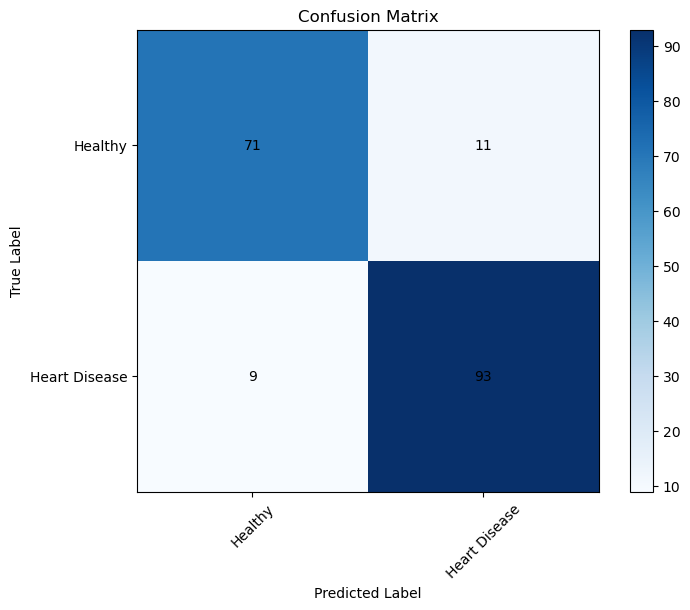

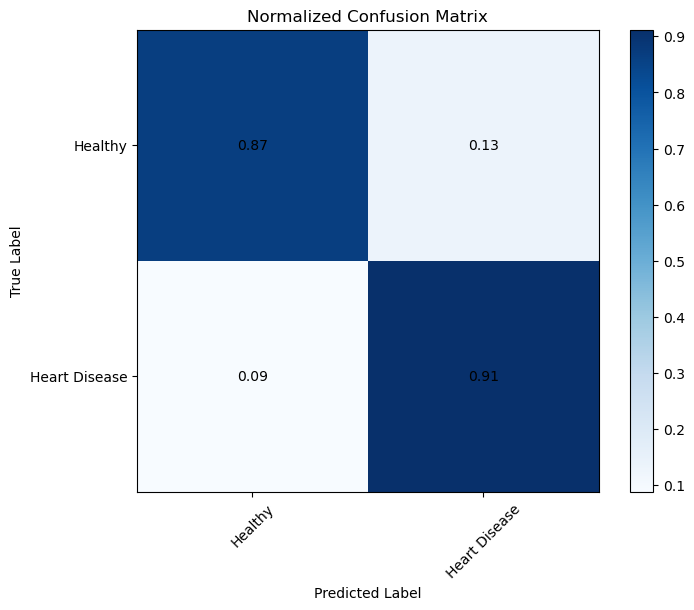

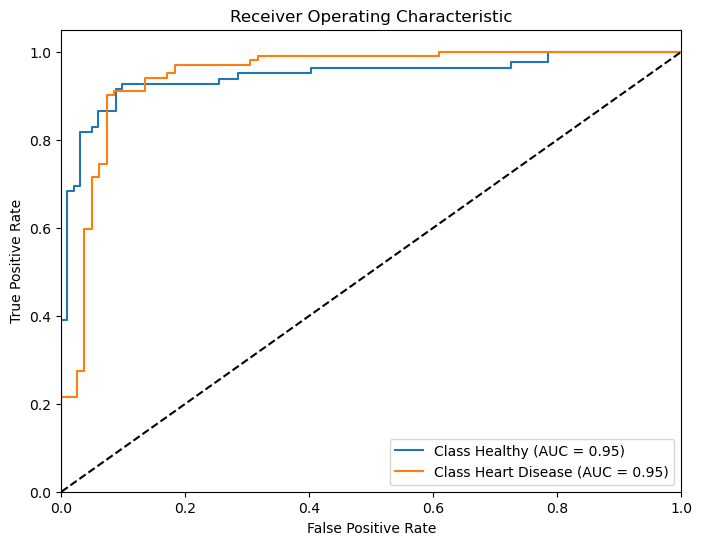

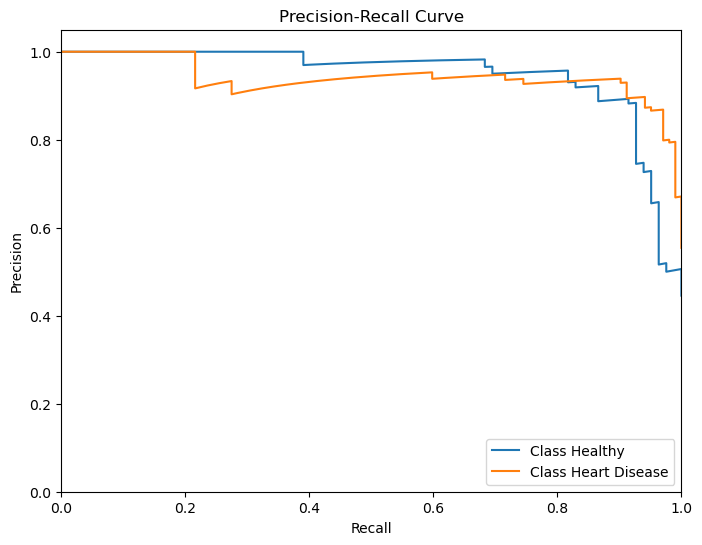

In [75]:
# Define the logistic regression classifier with its corresponding hyperparameters
logistic_regression_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200, 300] 
}

logistic_regression_classifier = LogisticRegression()

# Use the evaluate_classifier function to evaluate the logistic regression classifier
evaluate_classifier('Logistic Regression', logistic_regression_classifier, logistic_regression_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">KNN</h3>

Classifier: KNN
Best Parameters: {'leaf_size': 20, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Accuracy: 0.9
F1 Score: 0.9
Precision: 0.9
Recall: 0.9
               precision    recall  f1-score   support

      Healthy       0.91      0.87      0.89        82
Heart Disease       0.90      0.93      0.91       102

     accuracy                           0.90       184
    macro avg       0.90      0.90      0.90       184
 weighted avg       0.90      0.90      0.90       184



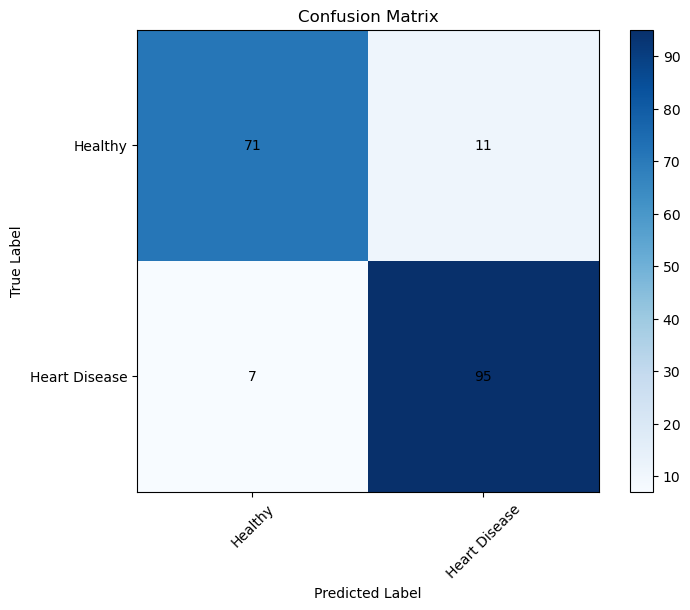

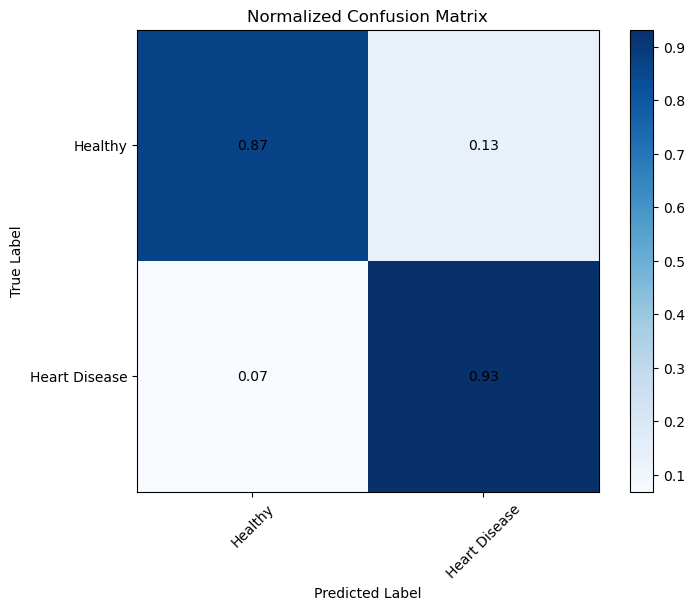

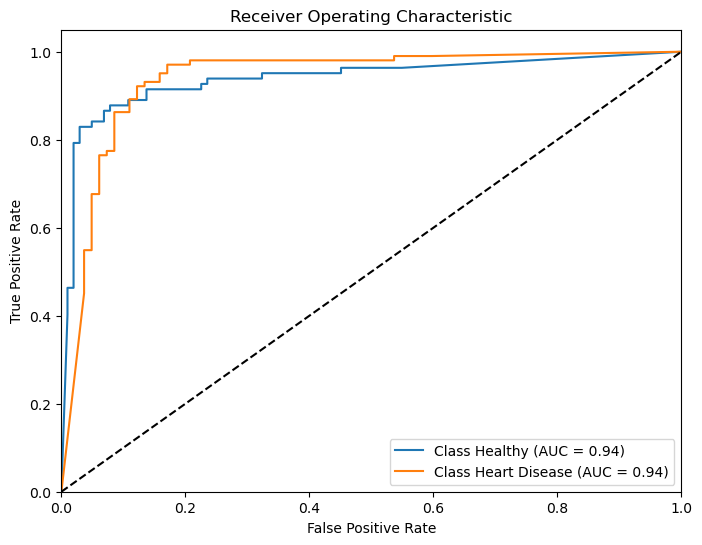

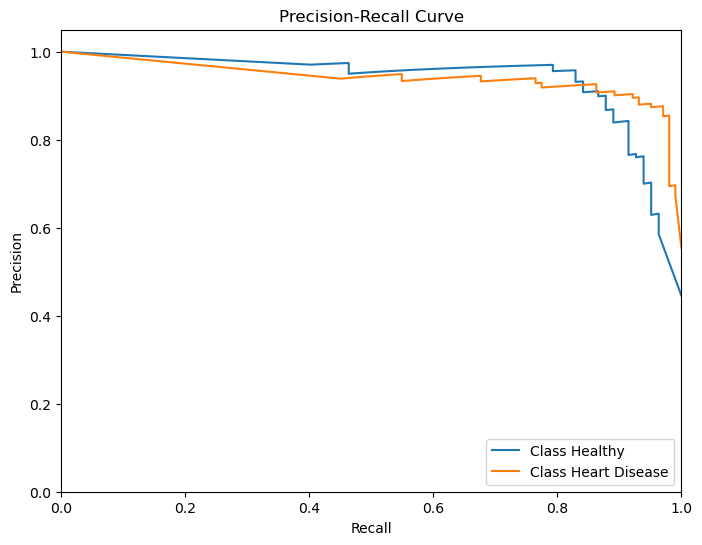

In [76]:
knn_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2], 
    'leaf_size': [20, 30, 40]
}

knn_classifier = KNeighborsClassifier()

# Use the evaluate_classifier function to evaluate the KNN classifier
evaluate_classifier('KNN', knn_classifier, knn_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">SVM</h3>

Classifier: SVM
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.91
F1 Score: 0.91
Precision: 0.92
Recall: 0.91
               precision    recall  f1-score   support

      Healthy       0.95      0.85      0.90        82
Heart Disease       0.89      0.96      0.92       102

     accuracy                           0.91       184
    macro avg       0.92      0.91      0.91       184
 weighted avg       0.92      0.91      0.91       184



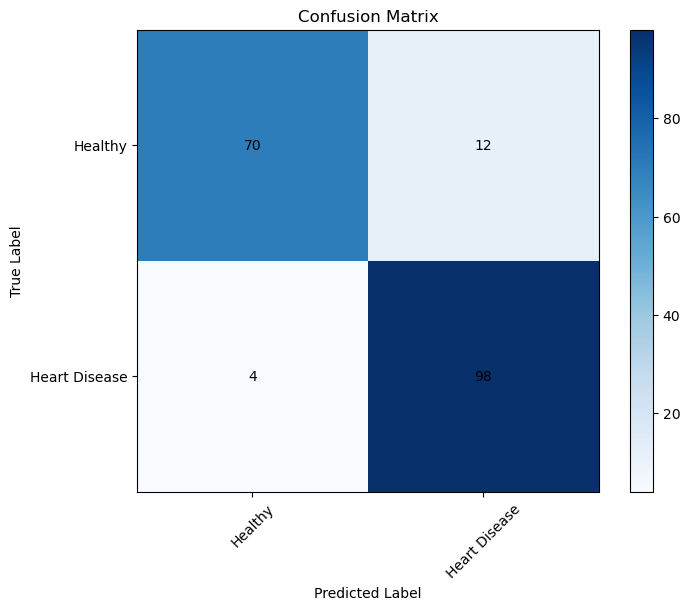

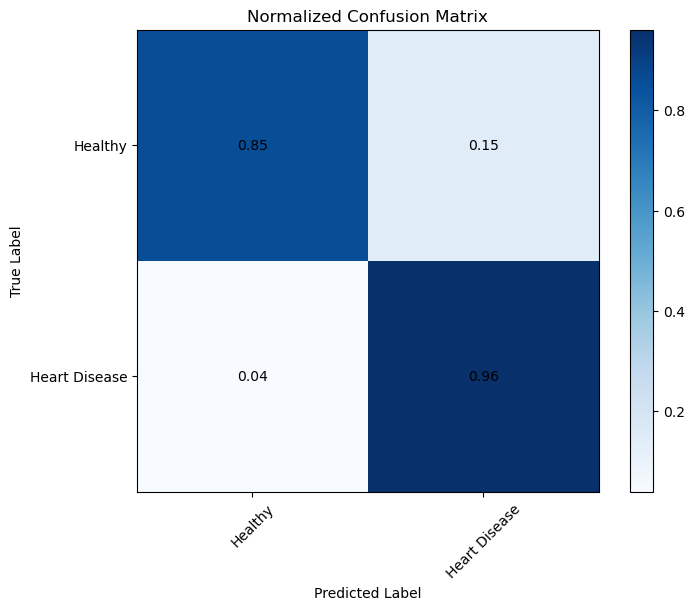

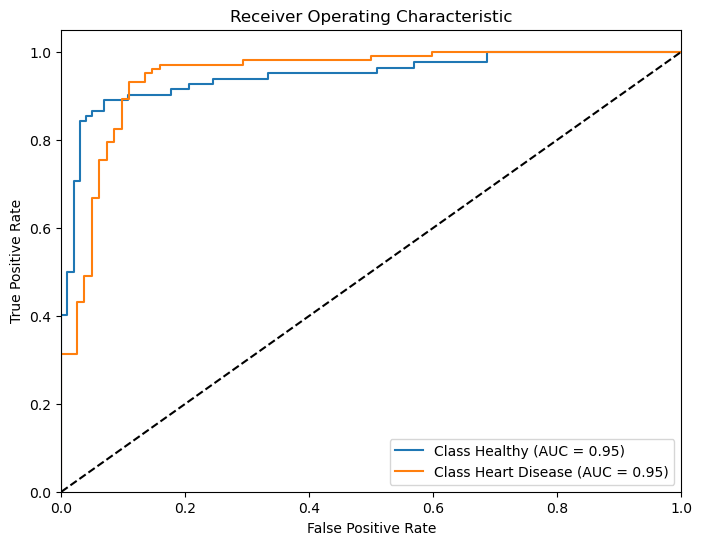

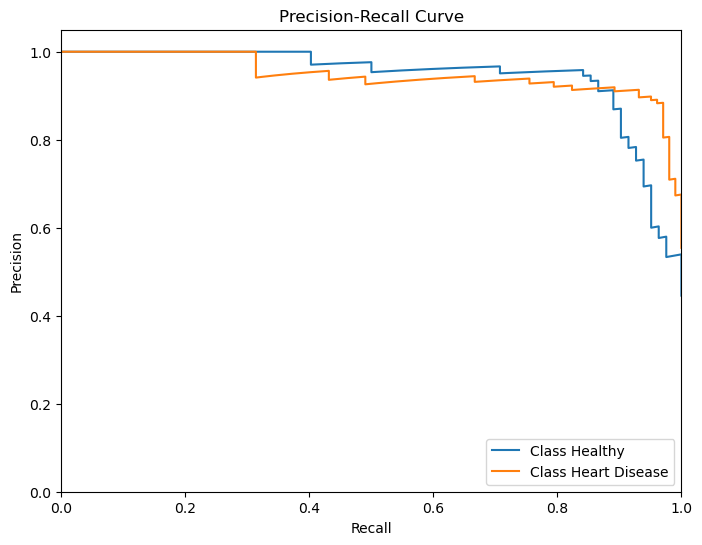

In [77]:
# Define the SVM classifier with its corresponding hyperparameters
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_classifier = SVC(probability=True)

# Use the evaluate_classifier function to evaluate the SVM classifier
evaluate_classifier('SVM', svm_classifier, svm_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Decision Tree</h3>

Classifier: Decision Tree
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.81
F1 Score: 0.81
Precision: 0.82
Recall: 0.81
               precision    recall  f1-score   support

      Healthy       0.75      0.85      0.80        82
Heart Disease       0.87      0.77      0.82       102

     accuracy                           0.81       184
    macro avg       0.81      0.81      0.81       184
 weighted avg       0.82      0.81      0.81       184



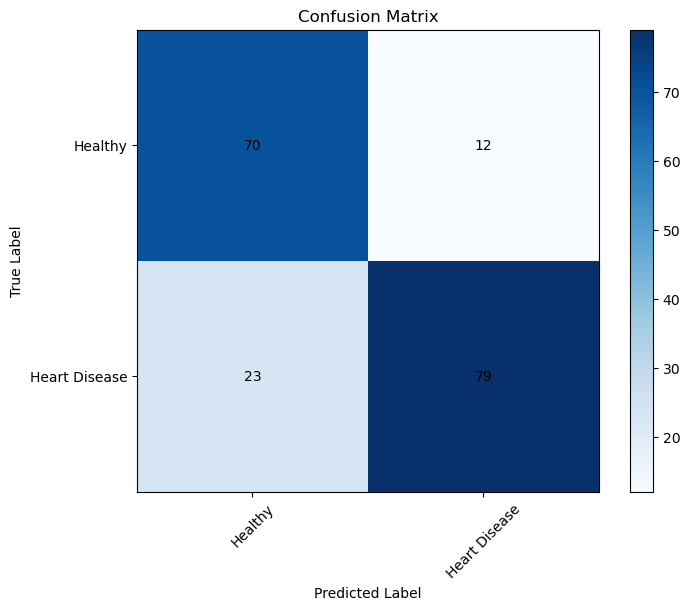

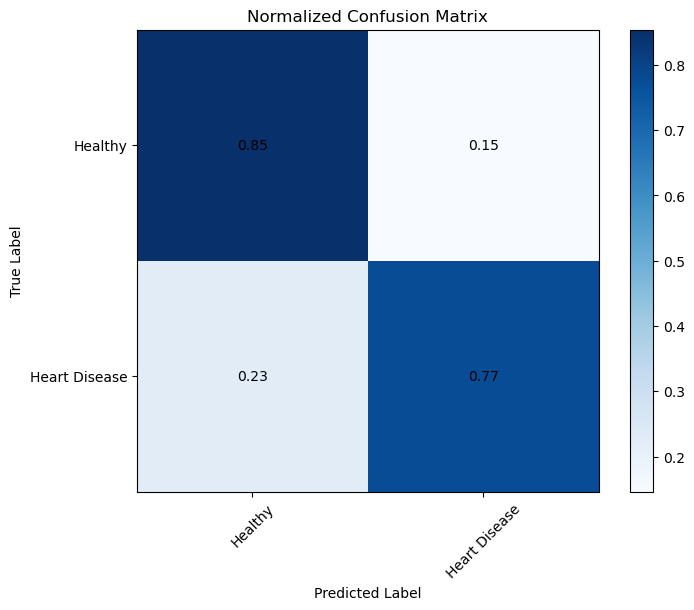

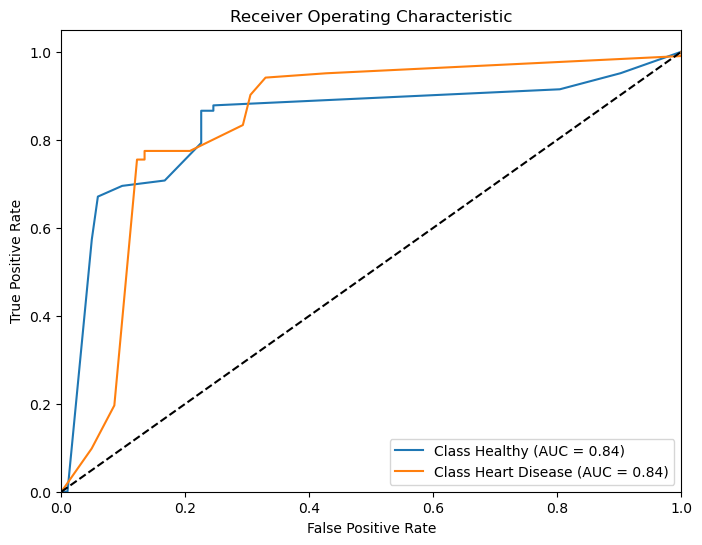

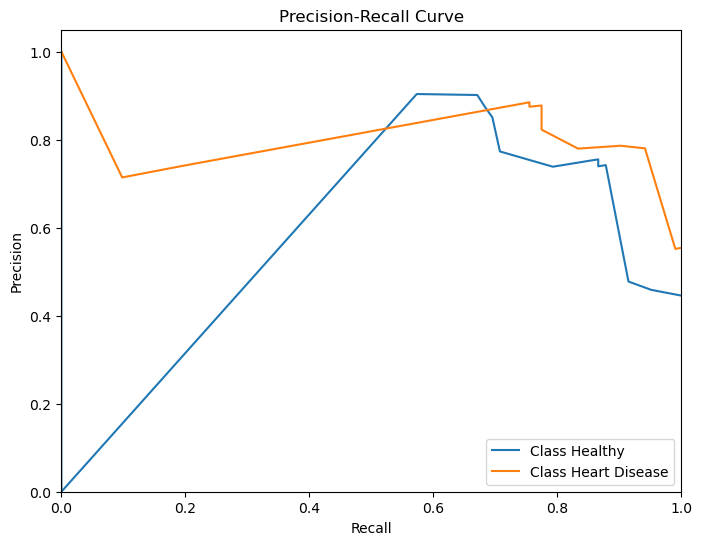

In [78]:
# Define the Decision Tree classifier with its corresponding hyperparameters
decision_tree_params = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
}

decision_tree_classifier = DecisionTreeClassifier()

# Use the evaluate_classifier function to evaluate the Decision Tree classifier
evaluate_classifier('Decision Tree', decision_tree_classifier, decision_tree_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Random Forest</h3>

Classifier: Random Forest
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.89
F1 Score: 0.88
Precision: 0.89
Recall: 0.89
               precision    recall  f1-score   support

      Healthy       0.92      0.82      0.86        82
Heart Disease       0.86      0.94      0.90       102

     accuracy                           0.89       184
    macro avg       0.89      0.88      0.88       184
 weighted avg       0.89      0.89      0.88       184



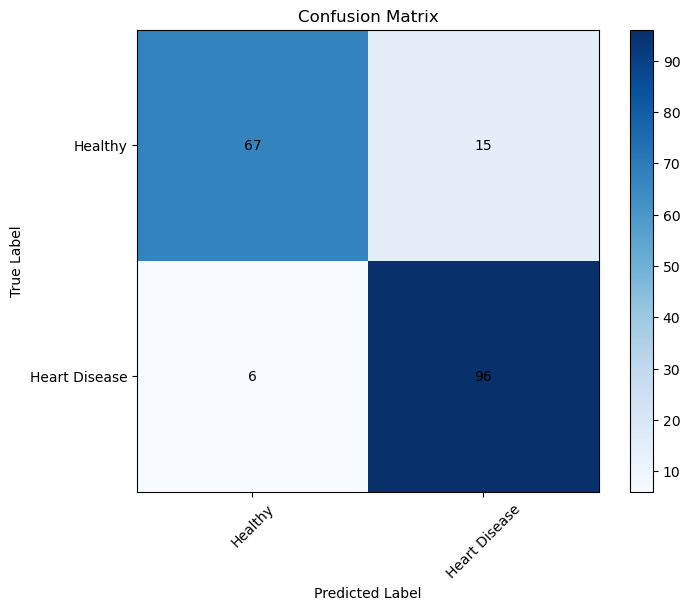

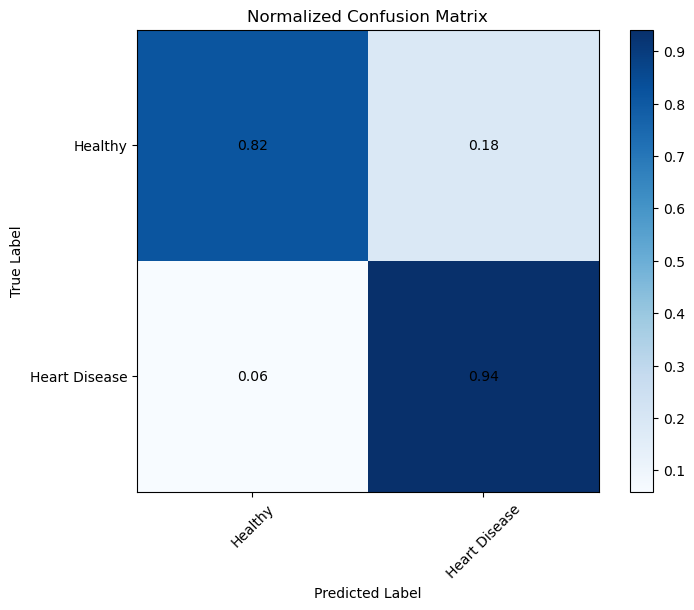

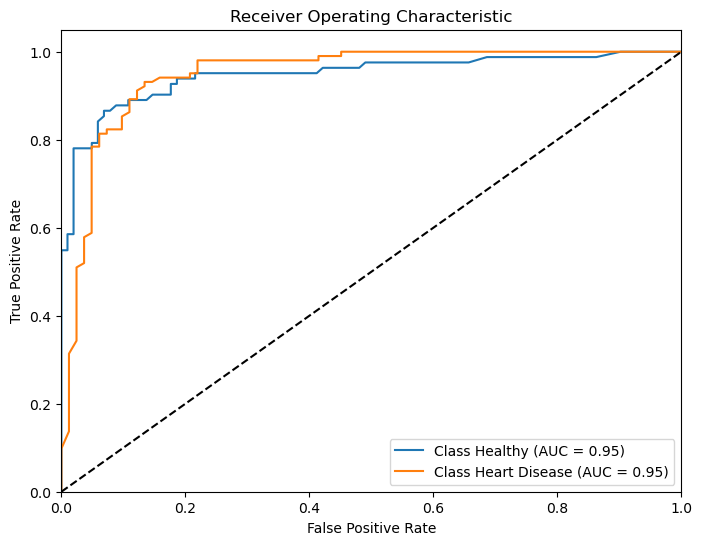

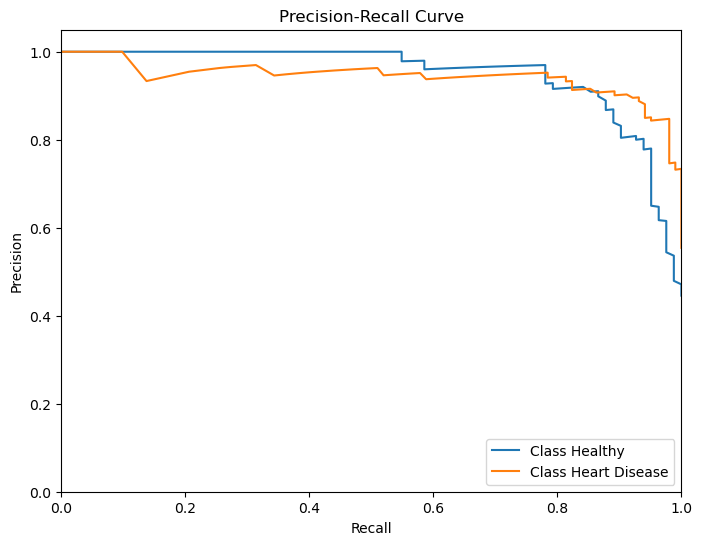

In [79]:
# Define the Random Forest classifier with its corresponding hyperparameters
random_forest_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5]
}

random_forest_classifier = RandomForestClassifier()

# Use the evaluate_classifier function to evaluate the Random Forest classifier
evaluate_classifier('Random Forest', random_forest_classifier, random_forest_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Extra Trees</h3>

Classifier: Extra Trees
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.89
F1 Score: 0.89
Precision: 0.89
Recall: 0.89
               precision    recall  f1-score   support

      Healthy       0.90      0.84      0.87        82
Heart Disease       0.88      0.92      0.90       102

     accuracy                           0.89       184
    macro avg       0.89      0.88      0.88       184
 weighted avg       0.89      0.89      0.89       184



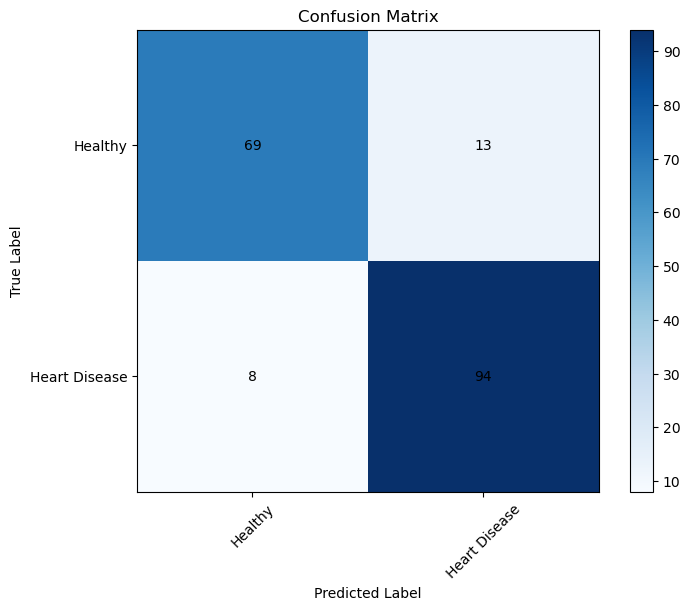

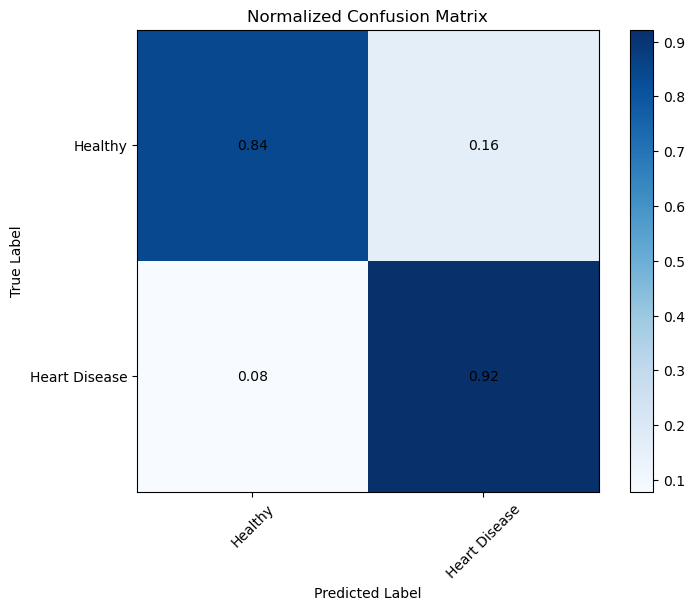

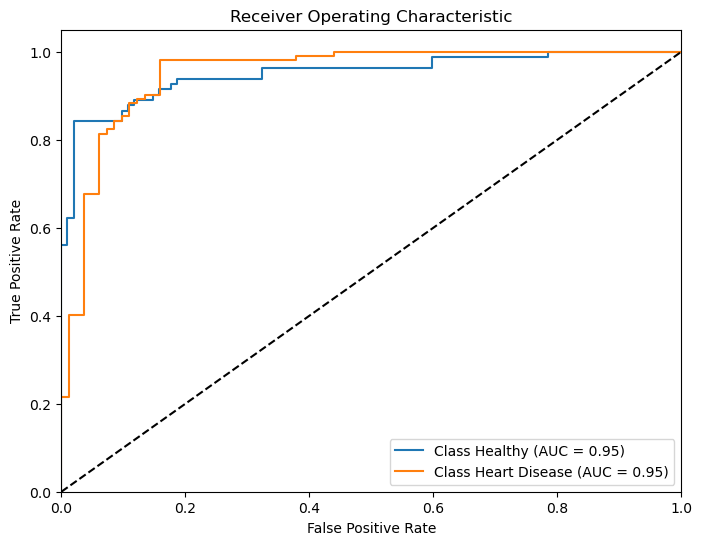

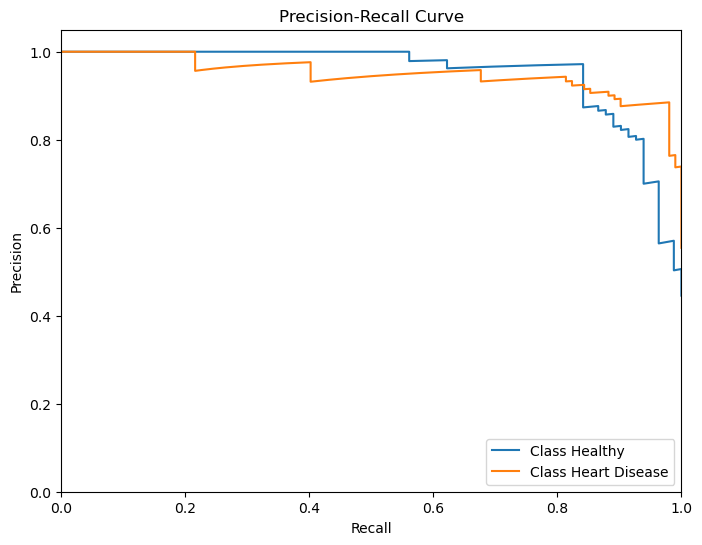

In [80]:
# Define the Extra tree classifier with its corresponding hyperparameters
extra_trees_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

extra_trees_classifier = ExtraTreesClassifier()

# Use the evaluate_classifier function to evaluate the Extra tree classifier
evaluate_classifier('Extra Trees', extra_trees_classifier, extra_trees_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">XGBoost</h3>

Classifier: XGBoost
Best Parameters: {'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50}
Accuracy: 0.89
F1 Score: 0.89
Precision: 0.89
Recall: 0.89
               precision    recall  f1-score   support

      Healthy       0.90      0.84      0.87        82
Heart Disease       0.88      0.92      0.90       102

     accuracy                           0.89       184
    macro avg       0.89      0.88      0.88       184
 weighted avg       0.89      0.89      0.89       184



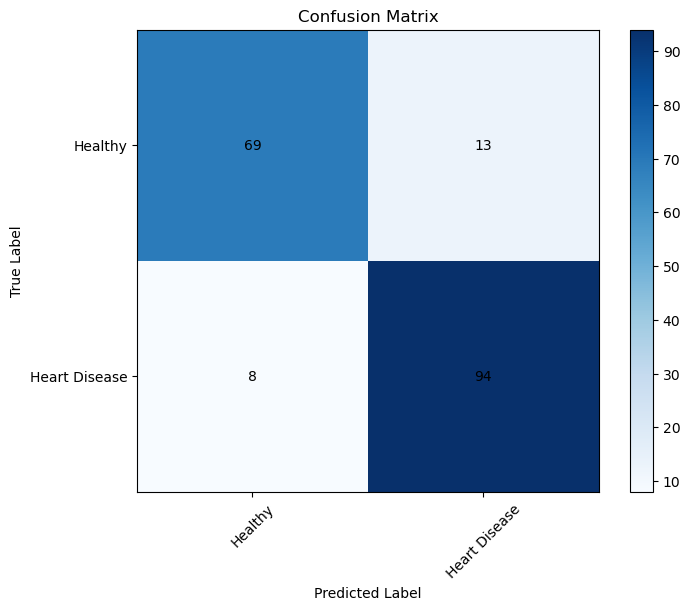

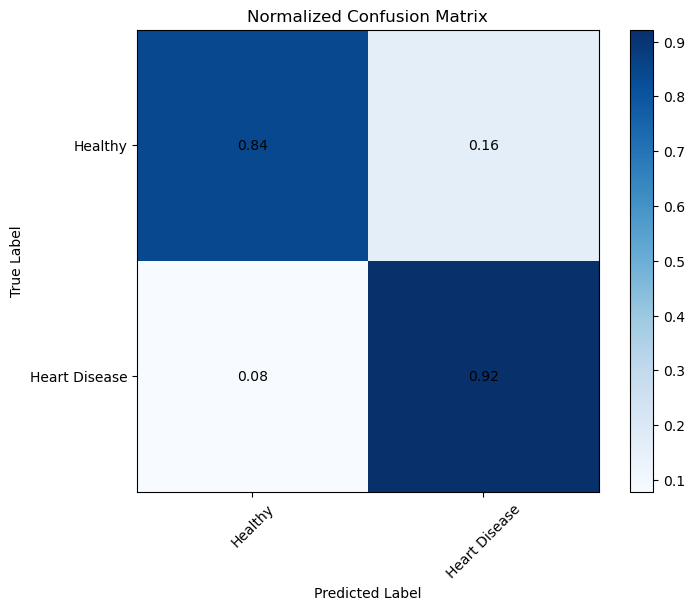

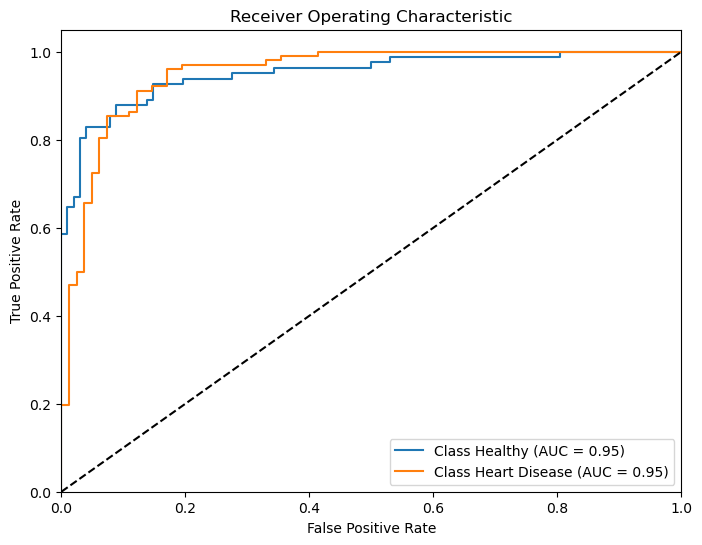

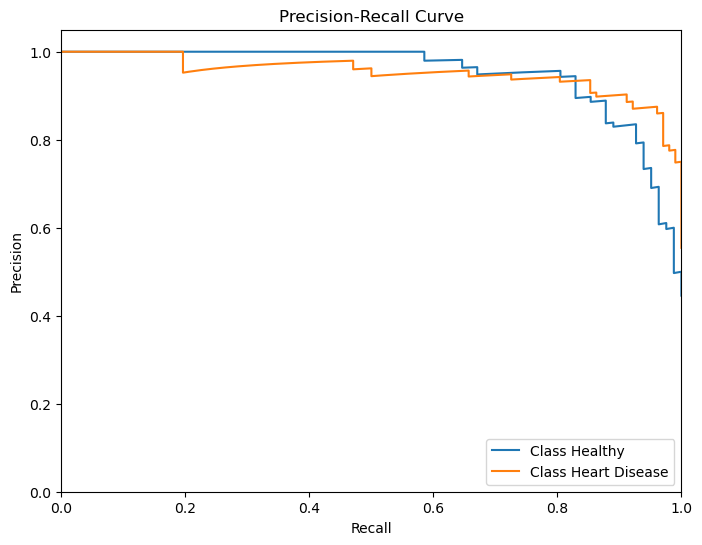

In [82]:
# Define the XGBoost classifier with its corresponding hyperparameters
xgboost_params = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3],
    'gamma': [0.1, 0.2]
}

xgboost_classifier = XGBClassifier()

# Use the evaluate_classifier function to evaluate the XGBoost classifier
evaluate_classifier('XGBoost', xgboost_classifier, xgboost_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Catboost</h3>

Classifier: CatBoost
Best Parameters: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Accuracy: 0.89
F1 Score: 0.89
Precision: 0.89
Recall: 0.89
               precision    recall  f1-score   support

      Healthy       0.93      0.82      0.87        82
Heart Disease       0.87      0.95      0.91       102

     accuracy                           0.89       184
    macro avg       0.90      0.88      0.89       184
 weighted avg       0.89      0.89      0.89       184



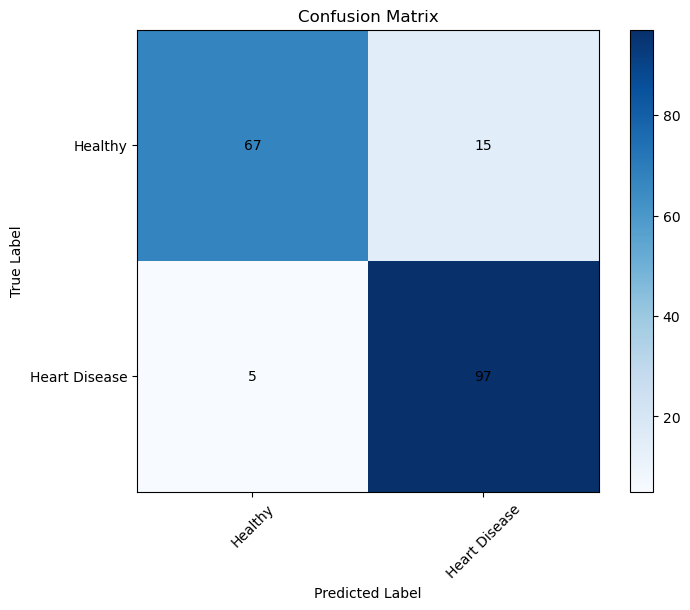

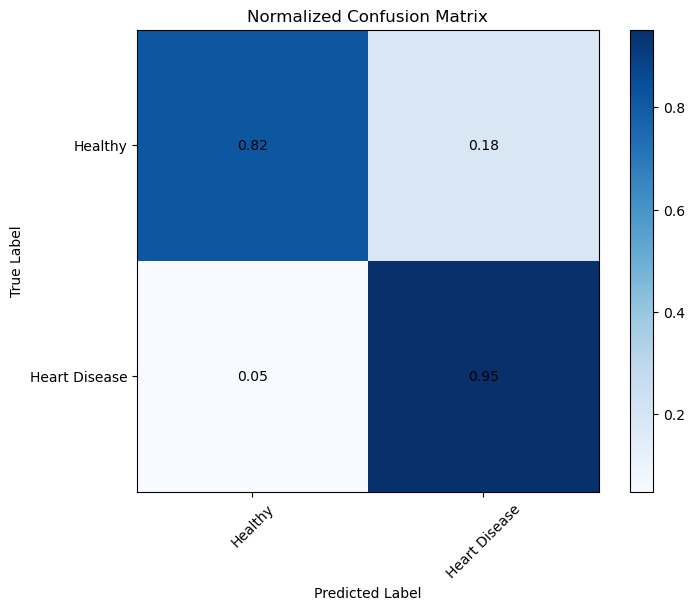

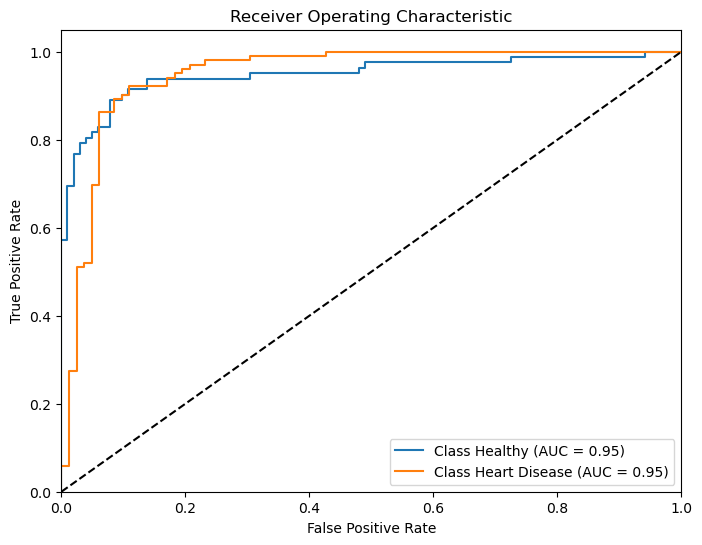

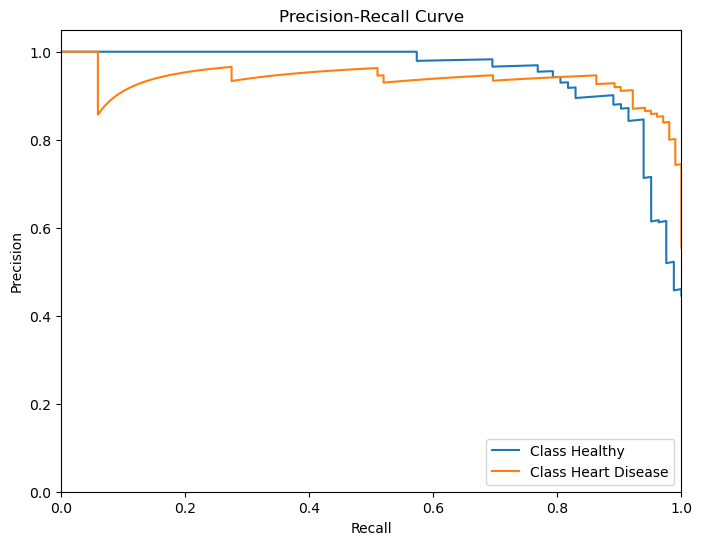

In [83]:
# Define CatBoost hyperparameters
catboost_params = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

catboost_classifier = CatBoostClassifier(verbose=0)  # Set verbose to 0 to avoid lengthy output

# Evaluate the CatBoost classifier
evaluate_classifier('CatBoost', catboost_classifier, catboost_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Gradient Boosting</h3>

Classifier: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.89
F1 Score: 0.89
Precision: 0.89
Recall: 0.89
               precision    recall  f1-score   support

      Healthy       0.88      0.87      0.87        82
Heart Disease       0.89      0.90      0.90       102

     accuracy                           0.89       184
    macro avg       0.88      0.88      0.88       184
 weighted avg       0.89      0.89      0.89       184



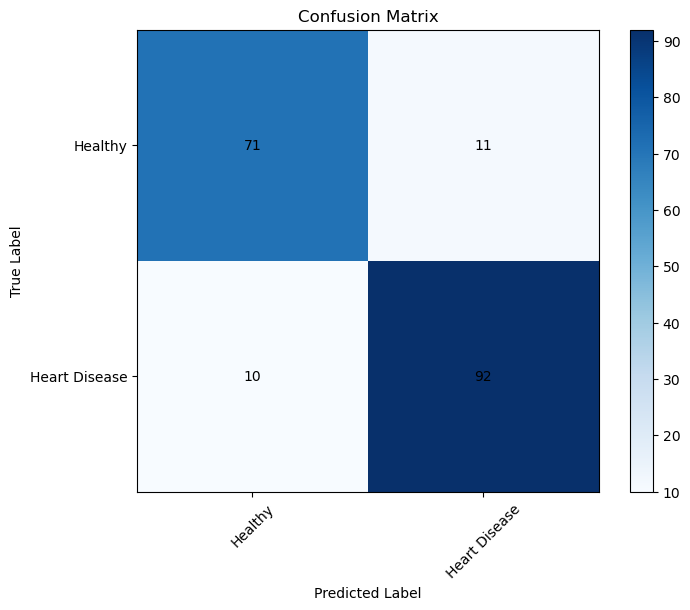

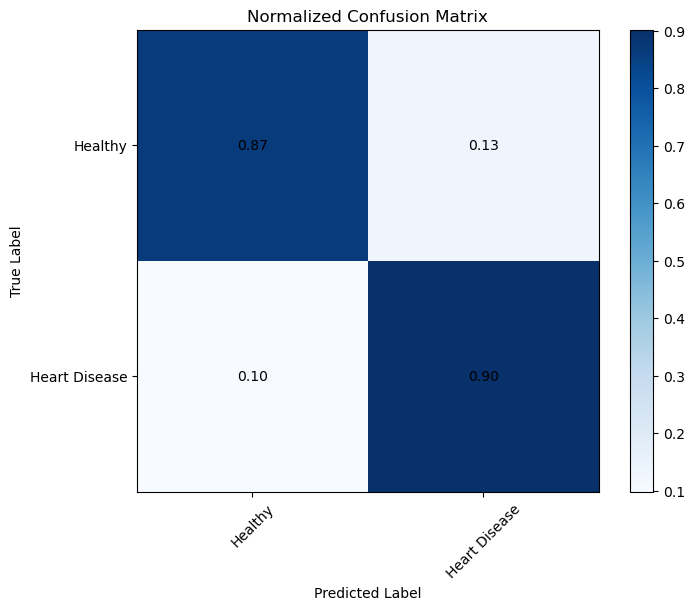

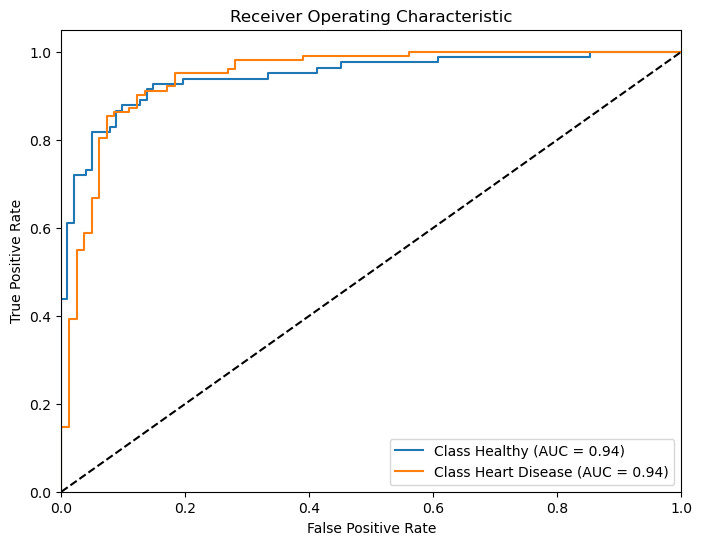

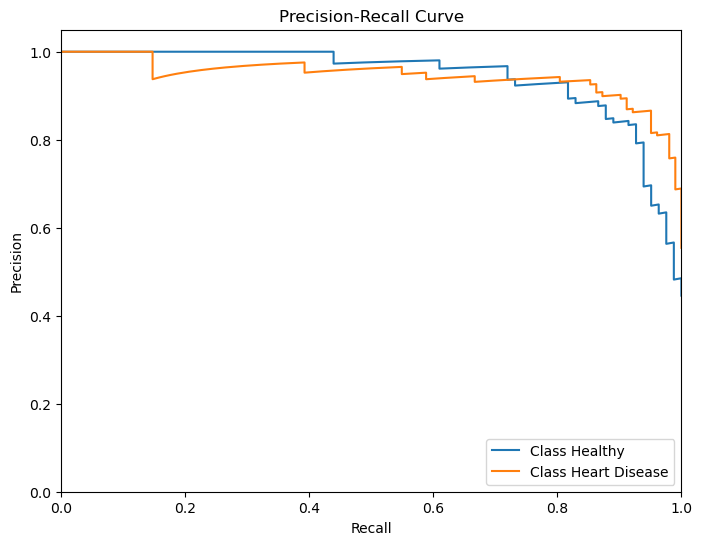

In [84]:
# Gradient Boosting hyperparameters
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_classifier = GradientBoostingClassifier()

# Evaluate Gradient Boosting Classifier
evaluate_classifier('Gradient Boosting', gb_classifier, gb_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Adaboost</h3>

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.89
F1 Score: 0.89
Precision: 0.89
Recall: 0.89
               precision    recall  f1-score   support

      Healthy       0.90      0.84      0.87        82
Heart Disease       0.88      0.92      0.90       102

     accuracy                           0.89       184
    macro avg       0.89      0.88      0.88       184
 weighted avg       0.89      0.89      0.89       184



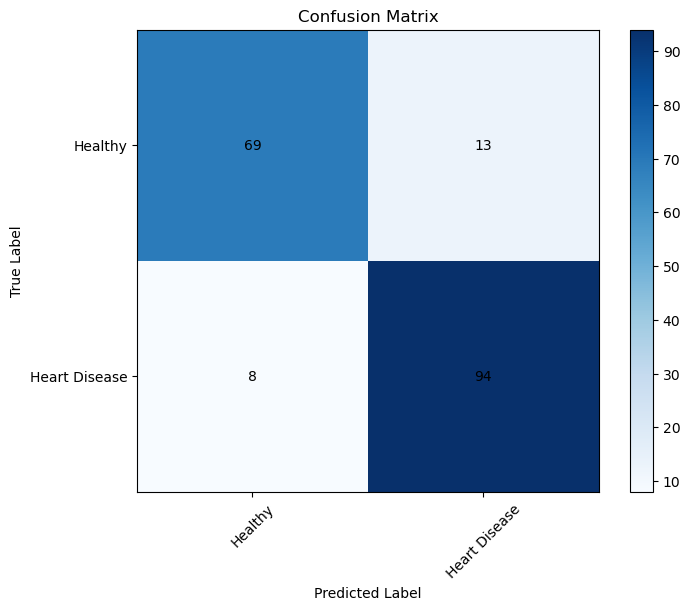

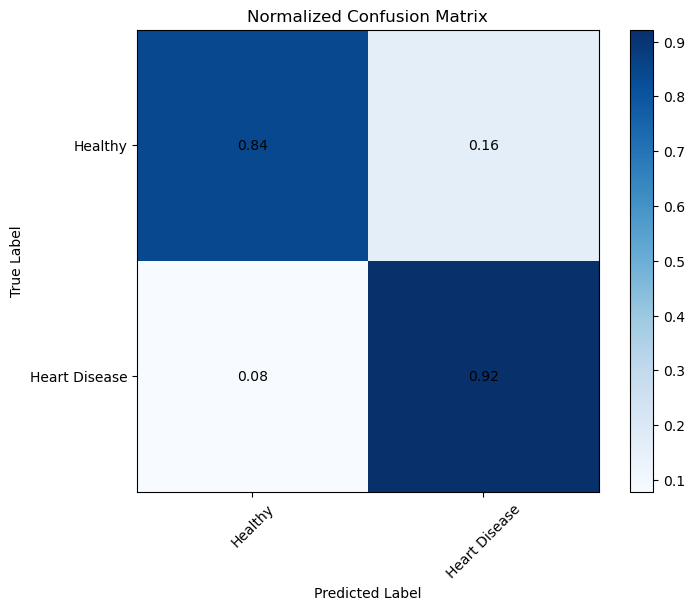

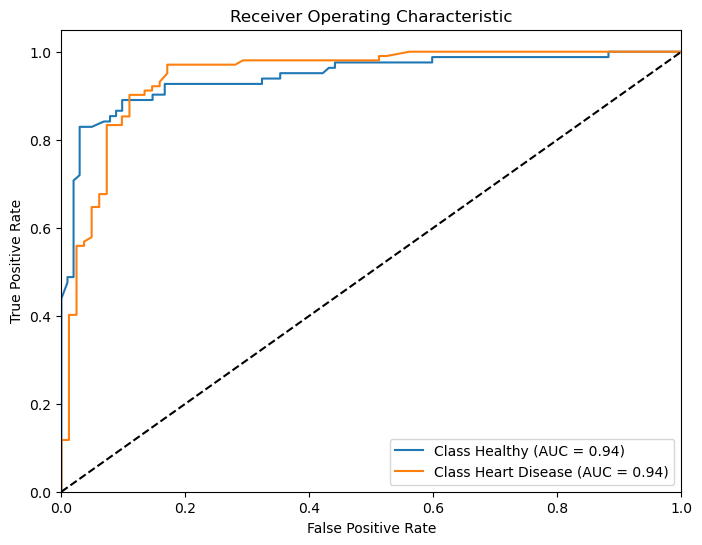

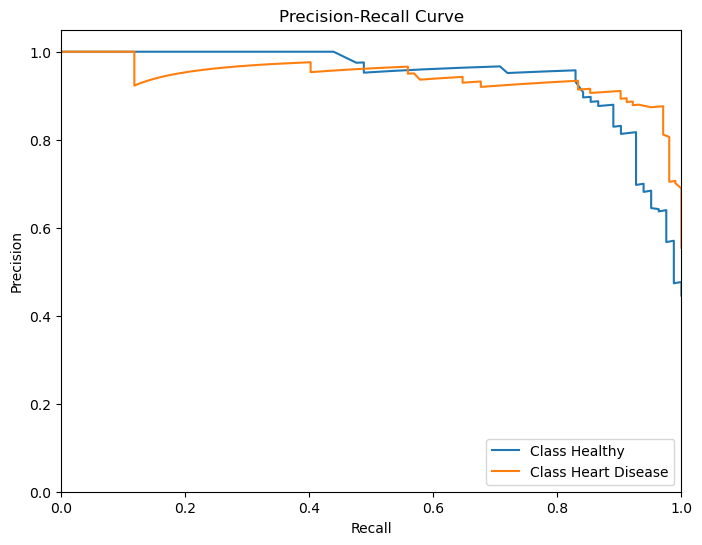

In [85]:
# AdaBoost hyperparameters
ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}
ab_classifier = AdaBoostClassifier()

# Evaluate AdaBoost Classifier
evaluate_classifier('AdaBoost', ab_classifier, ab_params)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Bagging</h3>

C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-package

Classifier: Bagging
Best Parameters: {'base_estimator': DecisionTreeClassifier(), 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
Accuracy: 0.9
F1 Score: 0.9
Precision: 0.9
Recall: 0.9
               precision    recall  f1-score   support

      Healthy       0.91      0.87      0.89        82
Heart Disease       0.90      0.93      0.91       102

     accuracy                           0.90       184
    macro avg       0.90      0.90      0.90       184
 weighted avg       0.90      0.90      0.90       184



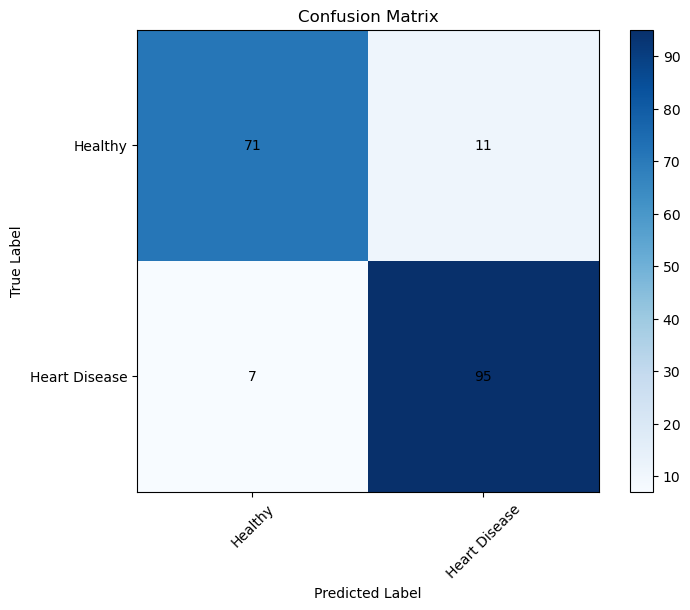

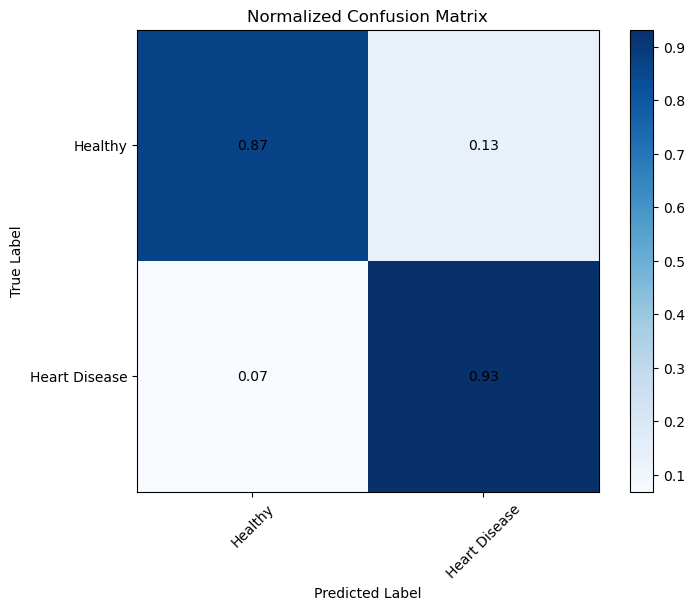

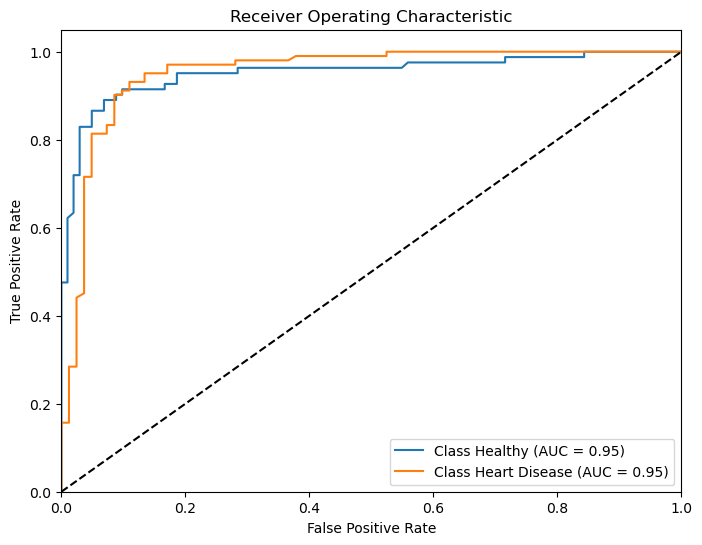

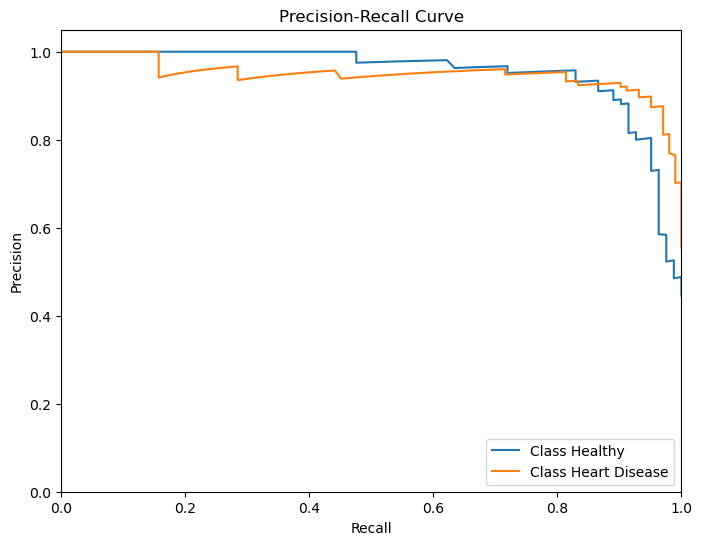

In [86]:
# Define the base estimator for bagging
base_estimator = DecisionTreeClassifier()

# Define Bagging hyperparameters
bagging_params = {
    'base_estimator': [base_estimator],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

# Create Bagging Classifier
bagging_classifier = BaggingClassifier()

# Evaluate Bagging Classifier
evaluate_classifier('Bagging', bagging_classifier, bagging_params)

<a id="2"></a>
<h1 style="background-color:pink;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Models Interpretation </h1>

Model interpretation at heart, is to find out ways to understand model decision making policies better. This is to enable fairness, accountability and transparency which will give humans enough confidence to use these models in real-world problems which a lot of impact to business and society.

In [87]:
# Importing shap and lime
import shap
import lime
import lime.lime_tabular

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Tuned Random Forest Interpretation</h3>

In [88]:
# Here is our best random forest model with its Best parameters from your grid search
best_rf_params = {'max_depth': None,
                  'min_samples_split': 2,
                  'n_estimators': 300}

best_rf_model = RandomForestClassifier(**best_rf_params)
best_rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Visualizing a sample tree</h3>

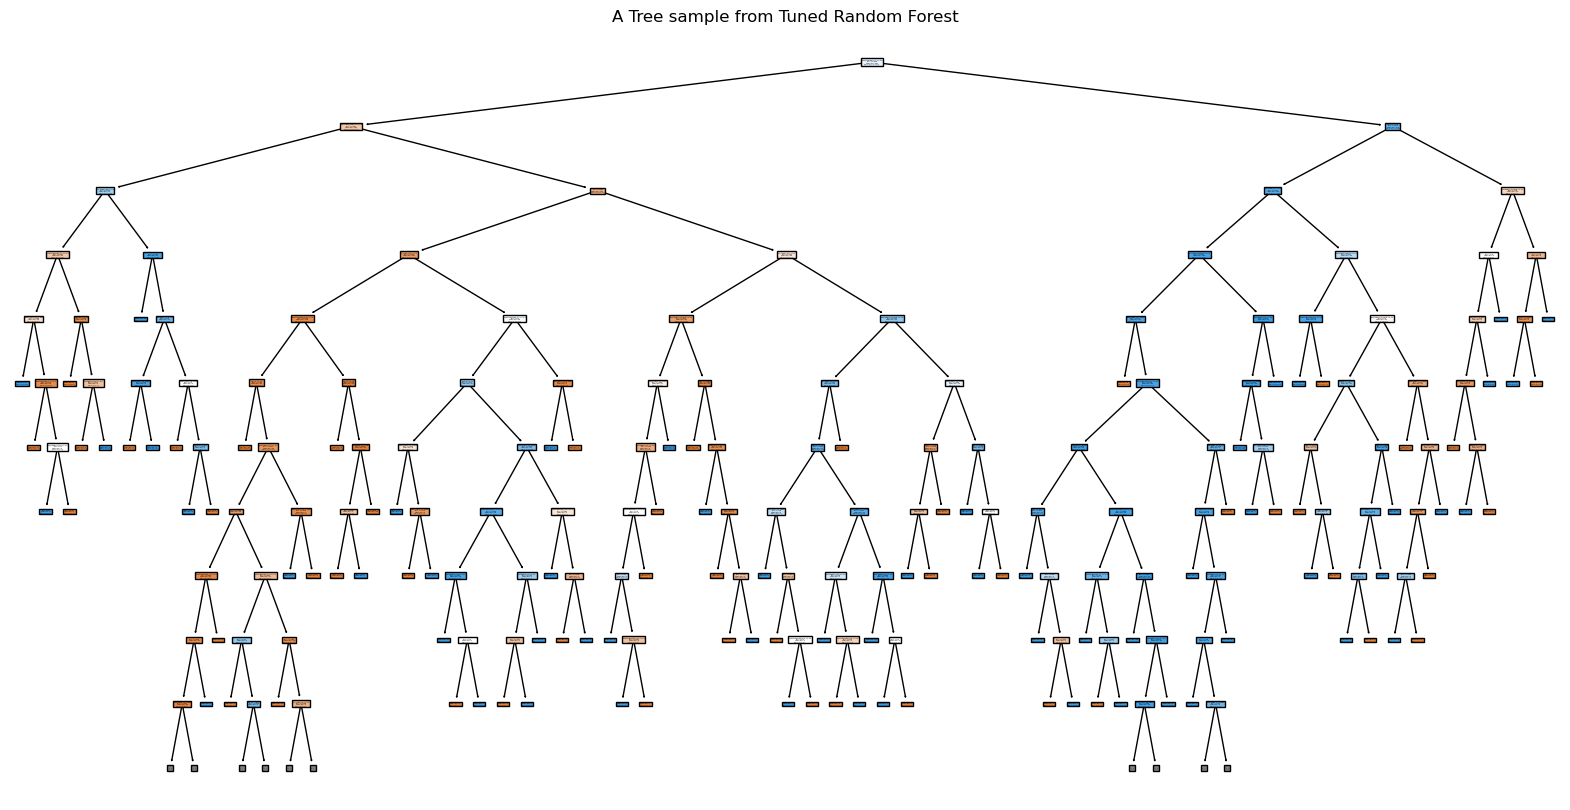

In [89]:
from sklearn.tree import plot_tree

# Random Forest: Visualize one tree
rf_single_tree = best_rf_model.estimators_[5]

# Convert column names to a list
feature_names_list = x_train.columns.tolist()

plt.figure(figsize=(20, 10))
plot_tree(rf_single_tree, filled=True, feature_names=feature_names_list, max_depth=10)
plt.title('A Tree sample from Tuned Random Forest')
plt.show()

<a id="2.1"></a>
<h3 style="background-color:#FCF5ED; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Features Importance</h3>

In [90]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'Feature':df.columns, 'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)


fi = rf_feat_importance(best_rf_model, x_train)
fi[:10].style.background_gradient(cmap='Purples')

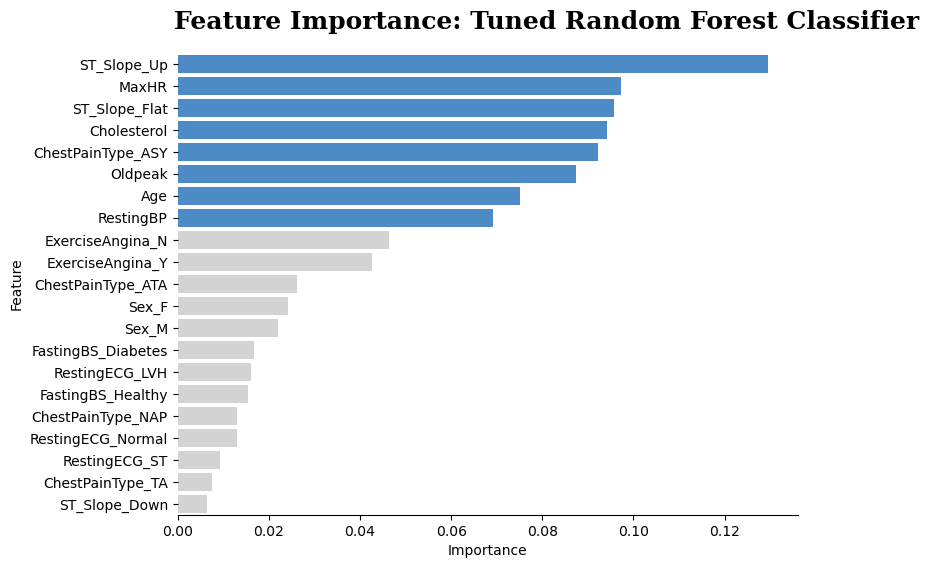

In [91]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))

color_map = ['lightgray' for _ in range(21)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = color_map[4] = color_map[5] = color_map[6] = color_map[7] = '#398bdb' # Top important features color highlight

sns.barplot(data=fi,x='Importance',y='Feature',ax=ax,palette=color_map)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
fig.text(0.12,0.92,"Feature Importance: Tuned Random Forest Classifier", fontsize=18, fontweight='bold', fontfamily='serif')

plt.show()

In [92]:
explainer = shap.TreeExplainer(best_rf_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(x_test)

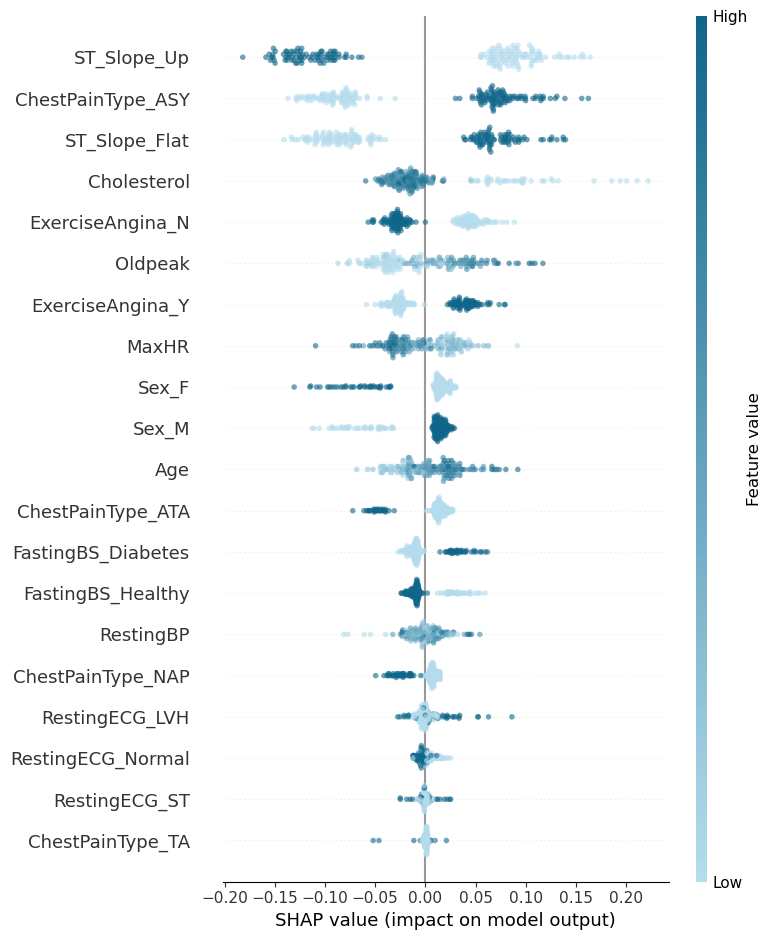

In [93]:
# custom colour plot
colors = ["#b4dced", "#0f668a"]           
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values[1], x_test,cmap=cmap,alpha=0.6)

<a id="2"></a>
<h1 style="background-color:pink;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Ensemble Learning</h1>

In [94]:
best_XGB_params = {'gamma': 0.1,
                   'learning_rate': 0.2,
                   'max_depth': 3,
                   'min_child_weight': 3,
                   'n_estimators': 50,
                   'subsample': 0.8}

best_XGB_model = XGBClassifier(**best_XGB_params)
best_XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
best_lr_params = {'C': 0.1,
                  'max_iter': 100,
                  'penalty': 'l2',
                  'solver': 'liblinear'}

best_lr_model = LogisticRegression(**best_lr_params)

best_lr_model.fit(x_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [96]:
# Gradient Boosting hyperparameters
best_gb_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 3
}
best_gb_model = GradientBoostingClassifier(**best_gb_params)

# Evaluate Gradient Boosting Classifier
best_gb_model.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [97]:
best_SVC_params =  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

best_SVC_model = SVC(probability=True, **best_SVC_params)
best_SVC_model.fit(x_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [98]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', best_rf_model),('XGB', best_XGB_model),('lr', best_lr_model), ('gb', best_gb_model), ('svc', best_SVC_model)],
    voting='soft'
)

# Fit the voting classifier on the training data and evaluate it
voting_clf.fit(x_train, y_train)
# Predict on the test set
y_pred = voting_clf.predict(x_test)
y_prob = voting_clf.predict_proba(x_test)

Voting Classifier : Random Forest + XGBoost + Logistic regression + Gradient Boosting soft voting
Accuracy: 0.9
F1 Score: 0.9
Precision: 0.9
Recall: 0.9


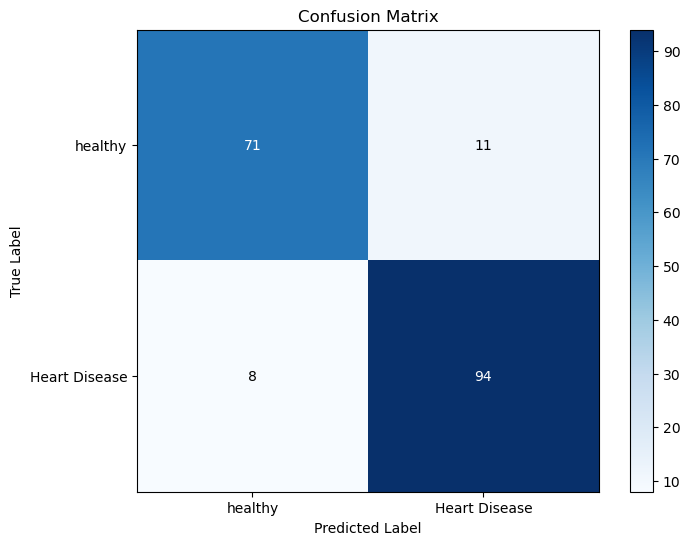

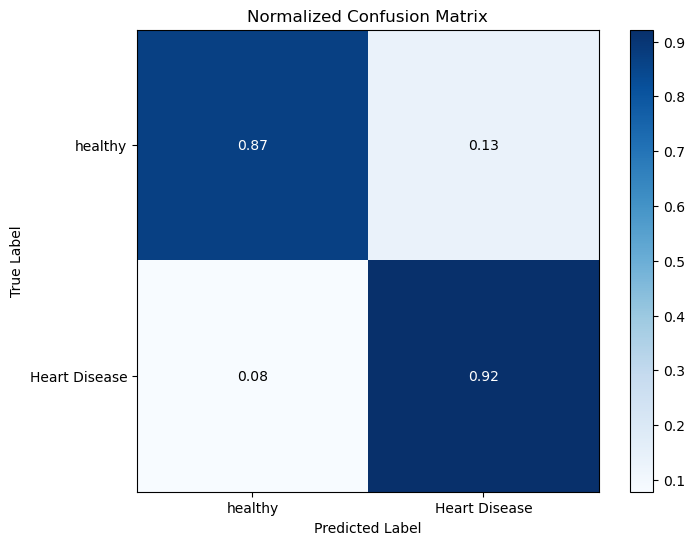

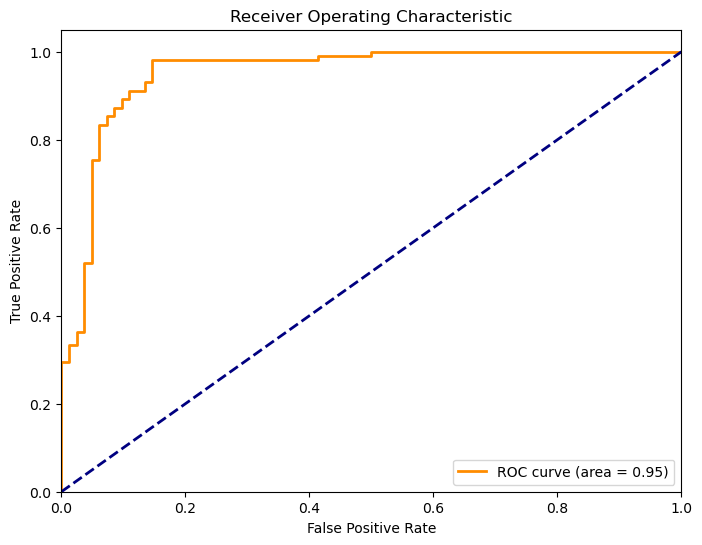

In [99]:
# Calculate metrics and print them
accuracy = voting_clf.score(x_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Voting Classifier : Random Forest + XGBoost + Logistic regression + Gradient Boosting soft voting')
print(f'Accuracy: {round(accuracy, 2)}')
print(f'F1 Score: {round(f1, 2)}')
print(f'Precision: {round(precision, 2)}')
print(f'Recall: {round(recall, 2)}')

# Define class labels
class_labels = {0: 'healthy', 1: 'Heart Disease'}

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(len(class_labels))
plt.xticks(ticks, [class_labels[i] for i in ticks])
plt.yticks(ticks, [class_labels[i] for i in ticks])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to the confusion matrix plot
for i in range(len(ticks)):
    for j in range(len(ticks)):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
plt.xticks(ticks, [class_labels[i] for i in ticks])
plt.yticks(ticks, [class_labels[i] for i in ticks])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to the normalized confusion matrix plot
for i in range(len(ticks)):
    for j in range(len(ticks)):
        plt.text(j, i, f'{cm_normalized[i, j]:.2f}', ha="center", va="center", color="white" if cm_normalized[i, j] > cm_normalized.max() / 2 else "black")

plt.show()

y_prob_1 = voting_clf.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_1)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Stacking 🔎🔎</h4>
  <p> 📌 Stacking or Stacked Generalization is an ensemble machine learning algorithm. It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms. The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.The stacking ensemble is illustrated in the figure below</p>
</div>

In [100]:
# Define the base models
base_models = [
    ('rf', best_rf_model),
    ('XGB',best_XGB_model),
    ('lr', best_lr_model),
    ('gb', best_gb_model),
    ('svc', best_SVC_model)
]

# Define the parameter grid for the SVM
svm_params = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create an SVM classifier for use in grid search
svm_classifier = SVC(probability=True)

# Create a scorer for F1 score
f1_scorer = make_scorer(f1_score)

# Perform grid search to find the best parameters for SVM
grid_search = GridSearchCV(svm_classifier, svm_params, scoring='roc_auc', cv=5)
grid_search.fit(x_train, y_train)

# Get the best SVM model
meta_model = grid_search.best_estimator_

# Create the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

# Fit the stacking classifier on the training data and evaluate it
stacking_clf.fit(x_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(x_test)
y_prob = stacking_clf.predict_proba(x_test)

Stacking Classifier : Random Forest + Logistic regression + XGBoost + Gradient Boosting with SVC as the meta model
Accuracy: 0.89
F1 Score: 0.89
Precision: 0.89
Recall: 0.89


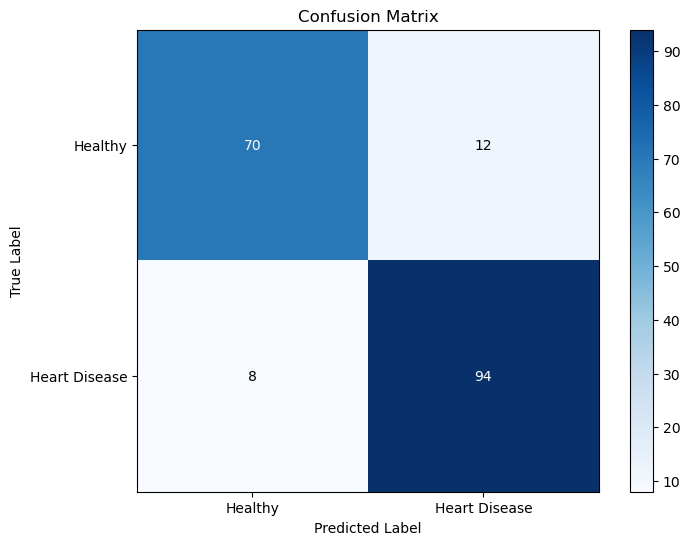

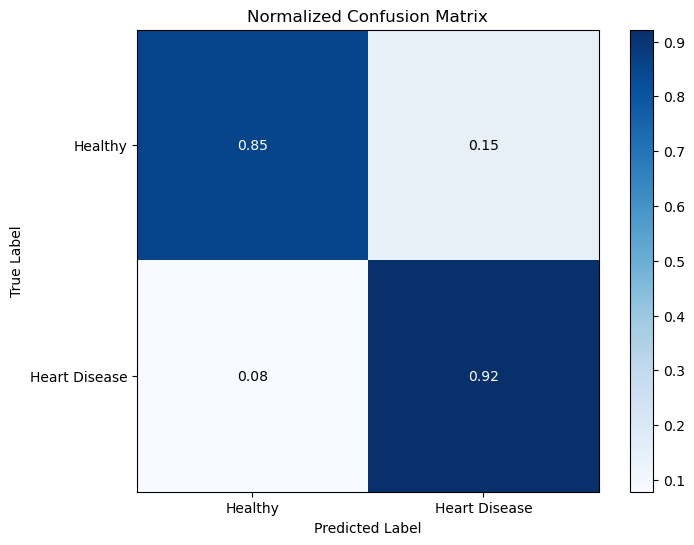

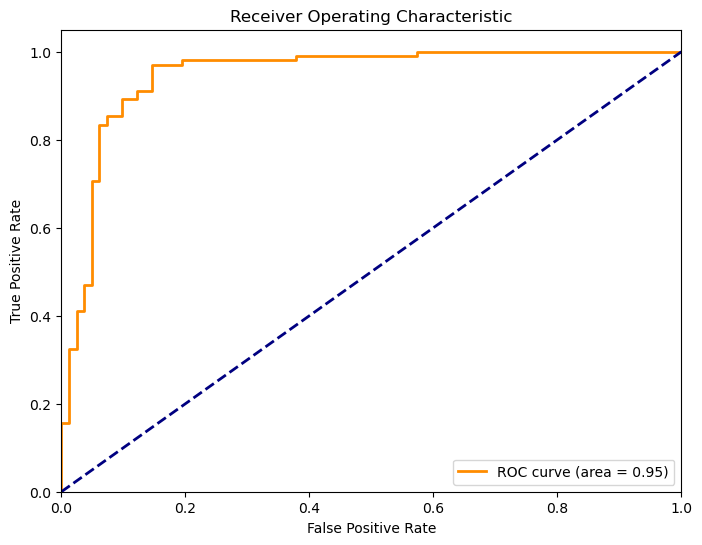

In [101]:
# Calculate metrics
accuracy = stacking_clf.score(x_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Stacking Classifier : Random Forest + Logistic regression + XGBoost + Gradient Boosting with SVC as the meta model')
print(f'Accuracy: {round(accuracy, 2)}')
print(f'F1 Score: {round(f1, 2)}')
print(f'Precision: {round(precision, 2)}')
print(f'Recall: {round(recall, 2)}')

# Define class labels
class_labels = {0: 'Healthy', 1: 'Heart Disease'}

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(len(class_labels))
plt.xticks(ticks, [class_labels[i] for i in ticks])
plt.yticks(ticks, [class_labels[i] for i in ticks])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to the confusion matrix plot
for i in range(len(ticks)):
    for j in range(len(ticks)):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
plt.xticks(ticks, [class_labels[i] for i in ticks])
plt.yticks(ticks, [class_labels[i] for i in ticks])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to the normalized confusion matrix plot
for i in range(len(ticks)):
    for j in range(len(ticks)):
        plt.text(j, i, f'{cm_normalized[i, j]:.2f}', ha="center", va="center", color="white" if cm_normalized[i, j] > cm_normalized.max() / 2 else "black")

plt.show()

y_prob_1 = stacking_clf.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_1)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()